# Part I - PISA 2012 Data Exploration
## by Tioluwani Jaiye-Tikolo

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangle">Preliminary Wrangling</a></li>
<li><a href="#uni">Univariate Exploration</a></li>
<li><a href="#bi">Bivariate Exploration</a></li>
<li><a href="#multi">Multivariate Exploration</a></li>
</ul>

<a id=intro></a>
## Introduction
> PISA is a survey of students' skills and knowledge as they approach the end of compulsory education. It is not a conventional school test. Rather than examining how well students have learned the school curriculum, it looks at how well prepared they are for life beyond school. Around 510,000 students in 65 economies took part in the PISA 2012 assessment of reading, mathematics and science representing about 28 million 15-year-olds globally. Of those economies, 44 took part in an assessment of creative problem solving and 18 in an assessment of financial literacy.


<a id=wrangle></a>
## Preliminary Wrangling

In [137]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load the dataset and read the first few lines
# change the encoding since the file is not ecoded with UTF-8
pisa = pd.read_csv('pisa2012.csv', encoding = "ISO-8859-1")
pisa.head()

,Unnamed: 0,CNT,SUBNATIO,STRATUM,OECD,NC,SCHOOLID,STIDSTD,ST01Q01,ST02Q01,...,W_FSTR75,W_FSTR76,W_FSTR77,W_FSTR78,W_FSTR79,W_FSTR80,WVARSTRR,VAR_UNIT,SENWGT_STU,VER_STU
0,1,Albania,80000,ALB0006,Non-OECD,Albania,1,1,10,1.0,...,13.7954,13.9235,13.1249,13.1249,4.3389,13.0829,19,1,0.2098,22NOV13
1,2,Albania,80000,ALB0006,Non-OECD,Albania,1,2,10,1.0,...,13.7954,13.9235,13.1249,13.1249,4.3389,13.0829,19,1,0.2098,22NOV13
2,3,Albania,80000,ALB0006,Non-OECD,Albania,1,3,9,1.0,...,12.7307,12.7307,12.7307,12.7307,4.2436,12.7307,19,1,0.1999,22NOV13
3,4,Albania,80000,ALB0006,Non-OECD,Albania,1,4,9,1.0,...,12.7307,12.7307,12.7307,12.7307,4.2436,12.7307,19,1,0.1999,22NOV13
4,5,Albania,80000,ALB0006,Non-OECD,Albania,1,5,9,1.0,...,12.7307,12.7307,12.7307,12.7307,4.2436,12.7307,19,1,0.1999,22NOV13


In [3]:
# check the number of rows and columns in the dataset
pisa.shape

(485490, 636)

In [4]:
# overview of dataset datatypes, and rows of features
pisa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 485490 entries, 0 to 485489
Columns: 636 entries, Unnamed: 0 to VER_STU
dtypes: float64(250), int64(18), object(368)
memory usage: 2.3+ GB


In [5]:
# since there is a lot of columns in the dataset, I looked through the data dictionary 'pisadict2012.csv'
# to find the relevant ones and picked those
pisa_new = pisa.iloc[:, np.r_[1, 10, 11, 12, 18:21, 27, 32, 33, 38, 67, 69:71, 72, 138:141, 340:346, 411, 488, 501:506, 541:551]]
pisa_new.head()

,CNT,ST03Q01,ST03Q02,ST04Q01,ST08Q01,ST09Q01,ST115Q01,ST13Q01,ST15Q01,ST17Q01,...,PV1READ,PV2READ,PV3READ,PV4READ,PV5READ,PV1SCIE,PV2SCIE,PV3SCIE,PV4SCIE,PV5SCIE
0,Albania,2,1996,Female,None,None,1.0,<ISCED level 3A>,"Other (e.g. home duties, retired)",<ISCED level 3A>,...,249.5762,254.3420,406.8496,175.7053,218.5981,341.7009,408.8400,348.2283,367.8105,392.9877
1,Albania,2,1996,Female,One or two times,None,1.0,<ISCED level 3A>,Working full-time <for pay>,<ISCED level 3A>,...,406.2936,349.8975,400.7334,369.7553,396.7618,548.9929,471.5964,471.5964,443.6218,454.8116
2,Albania,9,1996,Female,None,None,1.0,"<ISCED level 3B, 3C>",Working full-time <for pay>,<ISCED level 3A>,...,401.2100,404.3872,387.7067,431.3938,401.2100,499.6643,428.7952,492.2044,512.7191,499.6643
3,Albania,8,1996,Female,None,None,1.0,"<ISCED level 3B, 3C>",Working full-time <for pay>,<ISCED level 3A>,...,547.3630,481.4353,461.5776,425.0393,471.9036,438.6796,481.5740,448.9370,474.1141,426.5573
4,Albania,10,1996,Female,One or two times,None,2.0,She did not complete <ISCED level 1>,Working part-time <for pay>,"<ISCED level 3B, 3C>",...,311.7707,141.7883,293.5015,272.8495,260.1405,361.5628,275.7740,372.7527,403.5248,422.1746


In [6]:
pisa_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 485490 entries, 0 to 485489
Data columns (total 41 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   CNT       485490 non-null  object 
 1   ST03Q01   485490 non-null  int64  
 2   ST03Q02   485490 non-null  int64  
 3   ST04Q01   485490 non-null  object 
 4   ST08Q01   479143 non-null  object 
 5   ST09Q01   479131 non-null  object 
 6   ST115Q01  479269 non-null  float64
 7   ST13Q01   457979 non-null  object 
 8   ST15Q01   467751 non-null  object 
 9   ST17Q01   443261 non-null  object 
 10  ST19Q01   451410 non-null  object 
 11  ST29Q01   315911 non-null  object 
 12  ST29Q03   314928 non-null  object 
 13  ST29Q04   314737 non-null  object 
 14  ST29Q06   314746 non-null  object 
 15  ST55Q02   308171 non-null  object 
 16  ST55Q03   306090 non-null  object 
 17  ST55Q04   304130 non-null  object 
 18  IC22Q01   290487 non-null  object 
 19  IC22Q02   290000 non-null  object 
 20  IC22

In [7]:
pisa_new.describe()

,ST03Q01,ST03Q02,ST115Q01,AGE,WEALTH,PV1MATH,PV2MATH,PV3MATH,PV4MATH,PV5MATH,PV1READ,PV2READ,PV3READ,PV4READ,PV5READ,PV1SCIE,PV2SCIE,PV3SCIE,PV4SCIE,PV5SCIE
count,485490.000000,485490.000000,479269.000000,485374.000000,479597.00000,485490.000000,485490.000000,485490.000000,485490.000000,485490.000000,485490.000000,485490.000000,485490.000000,485490.000000,485490.000000,485490.000000,485490.000000,485490.000000,485490.00000,485490.000000
mean,6.558512,1996.070061,1.265356,15.784283,-0.33701,469.621653,469.648358,469.648930,469.641832,469.695396,472.004640,472.068052,472.022059,471.926562,472.013506,475.769824,475.813674,475.851549,475.78524,475.820184
std,3.705244,0.255250,0.578992,0.290221,1.21530,103.265391,103.382077,103.407631,103.392286,103.419170,102.505523,102.626198,102.640489,102.576066,102.659989,101.464426,101.514649,101.495072,101.51220,101.566347
min,1.000000,1996.000000,1.000000,15.170000,-6.65000,19.792800,6.473000,42.226200,24.622200,37.085200,0.083400,0.703500,0.703500,4.134400,2.307400,2.648300,2.834800,11.879900,8.42970,17.754600
25%,4.000000,1996.000000,1.000000,15.580000,-1.04000,395.318600,395.318600,395.240700,395.396500,395.240700,403.600700,403.360100,403.360100,403.354600,403.360100,404.457300,404.457300,404.550500,404.45730,404.457300
50%,7.000000,1996.000000,1.000000,15.750000,-0.30000,466.201900,466.124000,466.201900,466.279800,466.435600,475.455000,475.535200,475.455000,475.535200,475.535200,475.699400,475.606100,475.699400,475.97910,475.885900
75%,9.000000,1996.000000,1.000000,16.000000,0.43000,541.057800,541.447300,541.291500,541.447300,541.447300,544.502500,544.503500,544.503500,544.502500,544.503500,547.780700,547.873900,547.967200,547.78070,547.780700
max,99.000000,1997.000000,4.000000,16.330000,3.25000,962.229300,957.010400,935.745400,943.456900,907.625800,904.802600,881.239200,884.447000,881.159000,901.608600,903.338300,900.540800,867.624000,926.55730,880.958600


In [8]:
# chcek the number of duplicates in the data
pisa_new.duplicated().sum()

0

### What is the structure of your dataset?

> There was originally 485490 rows in the dataset with 636 features ranging from qualitative to catogorical data. Most of the variables are numeric in nature with various features cutting through mulitple levels. I have picked columns I found relevant to the exploration and the current dataset includes 39 columns.

### What is/are the main feature(s) of interest in your dataset?

> I'm most intrested in figuring out the features which affect the score of Maths, Reading, Science, and total 

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> I am currently looking at a range of features, from age, birth month, year, age, gender, parent's job standing and highest qualification, possessions etc. 

> I believe these features would have effects on the total scores in the features mentioned earlier and features such as out of school lessons and attitudes would help as well.

In [9]:
# rename columns to have specified meaninings and for easier use
pisa_new = pisa_new.rename(columns = {'CNT':'Country', 'ST03Q01':'Birth_Month','ST03Q02':'Birth_Year', 
                           'ST04Q01':'Gender','ST08Q01':'Truancy_Late', 'ST09Q01':'Truancy_Skip',
                          'ST115Q01':'Truancy_Class','ST13Q01':'Mother_Schooling','ST15Q01':'Mother_Job', 'ST17Q01':'Father_Schooling',
                          'ST19Q01':'Father_Job','ST29Q01':'Math_EnjoyReading', 'ST29Q03':'Math_Lessons', 'ST29Q04':'Math_EnjoyLessons',
                            'ST29Q06':'Math_Interested','ST55Q02':'Out_Maths', 'ST55Q03':'Out_Science','ST55Q04':'Out_Other',  
                           'IC22Q01':'Attitude_Useful', 'IC22Q02': 'Attitude_Homework','IC22Q04': 'Attitude_Information', 
                           'IC22Q06':'Attitude_Troublesome','IC22Q07':'Attitude_Notsuitable', 
                            'IC22Q08':'Attitude_Unreliable','AGE':'Age', 'WEALTH':'Wealth'})

In [10]:
pisa_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 485490 entries, 0 to 485489
Data columns (total 41 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Country               485490 non-null  object 
 1   Birth_Month           485490 non-null  int64  
 2   Birth_Year            485490 non-null  int64  
 3   Gender                485490 non-null  object 
 4   Truancy_Late          479143 non-null  object 
 5   Truancy_Skip          479131 non-null  object 
 6   Truancy_Class         479269 non-null  float64
 7   Mother_Schooling      457979 non-null  object 
 8   Mother_Job            467751 non-null  object 
 9   Father_Schooling      443261 non-null  object 
 10  Father_Job            451410 non-null  object 
 11  Math_EnjoyReading     315911 non-null  object 
 12  Math_Lessons          314928 non-null  object 
 13  Math_EnjoyLessons     314737 non-null  object 
 14  Math_Interested       314746 non-null  object 
 15  

In [11]:
# check on the values of the country feature
pisa_new['Country'].unique()

array(['Albania', 'United Arab Emirates', 'Argentina', 'Australia',
       'Austria', 'Belgium', 'Bulgaria', 'Brazil', 'Canada',
       'Switzerland', 'Chile', 'Colombia', 'Costa Rica', 'Czech Republic',
       'Germany', 'Denmark', 'Spain', 'Estonia', 'Finland', 'France',
       'United Kingdom', 'Greece', 'Hong Kong-China', 'Croatia',
       'Hungary', 'Indonesia', 'Ireland', 'Iceland', 'Israel', 'Italy',
       'Jordan', 'Japan', 'Kazakhstan', 'Korea', 'Liechtenstein',
       'Lithuania', 'Luxembourg', 'Latvia', 'Macao-China', 'Mexico',
       'Montenegro', 'Malaysia', 'Netherlands', 'Norway', 'New Zealand',
       'Peru', 'Poland', 'Portugal', 'Qatar', 'China-Shanghai',
       'Perm(Russian Federation)', 'Florida (USA)', 'Connecticut (USA)',
       'Massachusetts (USA)', 'Romania', 'Russian Federation',
       'Singapore', 'Serbia', 'Slovak Republic', 'Slovenia', 'Sweden',
       'Chinese Taipei', 'Thailand', 'Tunisia', 'Turkey', 'Uruguay',
       'United States of America', 'Vietn

In [12]:
# replace instances of USA seen in 'Florida (USA)', 'Connecticut (USA)', 'Massachusetts (USA)' with 'United States of America'
# change 'Macao-China', 'China-Shanghai', 'Hong Kong-China' to 'China'
# Perm(Russian Federation) is replaced with 'Russian Federation'
pisa_new.loc[pisa_new['Country'].str.contains('USA', case=True), 'Country'] = 'United States of America'
pisa_new.loc[pisa_new['Country'].str.contains('China', case=False), 'Country'] = 'China'
pisa_new.loc[pisa_new['Country'].str.contains('Russian Federation', case=False), 'Country'] = 'Russia'

In [13]:
# check if the changes have been applied
pisa_new['Country'].unique()

array(['Albania', 'United Arab Emirates', 'Argentina', 'Australia',
       'Austria', 'Belgium', 'Bulgaria', 'Brazil', 'Canada',
       'Switzerland', 'Chile', 'Colombia', 'Costa Rica', 'Czech Republic',
       'Germany', 'Denmark', 'Spain', 'Estonia', 'Finland', 'France',
       'United Kingdom', 'Greece', 'China', 'Croatia', 'Hungary',
       'Indonesia', 'Ireland', 'Iceland', 'Israel', 'Italy', 'Jordan',
       'Japan', 'Kazakhstan', 'Korea', 'Liechtenstein', 'Lithuania',
       'Luxembourg', 'Latvia', 'Mexico', 'Montenegro', 'Malaysia',
       'Netherlands', 'Norway', 'New Zealand', 'Peru', 'Poland',
       'Portugal', 'Qatar', 'Russia', 'United States of America',
       'Romania', 'Singapore', 'Serbia', 'Slovak Republic', 'Slovenia',
       'Sweden', 'Chinese Taipei', 'Thailand', 'Tunisia', 'Turkey',
       'Uruguay', 'Vietnam'], dtype=object)

In [14]:
# check the Birth_Month unique values 
pisa_new['Birth_Month'].unique()

array([ 2,  9,  8, 10,  3,  6,  5,  4,  7,  1, 12, 11, 99], dtype=int64)

In [15]:
# change values with 99 in Birth_Month to nan 
pisa_new['Birth_Month'] = pisa_new['Birth_Month'].replace([99], np.nan)

In [16]:
# confirn the changes ot birth month
pisa_new['Birth_Month'].unique()

array([ 2.,  9.,  8., 10.,  3.,  6.,  5.,  4.,  7.,  1., 12., 11., nan])

In [17]:
# check Birth_Year column
pisa_new ['Birth_Year'].unique()

array([1996, 1997], dtype=int64)

In [18]:
# check out Trunacy_Late column
pisa_new['Truancy_Late'].unique()

array(['None  ', 'One or two times  ', 'Three or four times  ', nan,
       'Five or more times  '], dtype=object)

In [19]:
# strip white space in Truancy_Late and Truancy_Skip
pisa_new['Truancy_Late'] = pisa_new['Truancy_Late'].str.strip()
pisa_new['Truancy_Skip'] = pisa_new['Truancy_Skip'].str.strip()

In [20]:
# confirm changes in unique values
print(pisa_new['Truancy_Late'].unique())
pisa_new['Truancy_Skip'].unique()

['None' 'One or two times' 'Three or four times' nan 'Five or more times']


array(['None', nan, 'One or two times', 'Three or four times',
       'Five or more times'], dtype=object)

In [21]:
# check out Truancy_class values
pisa_new['Truancy_Class'].unique()

array([ 1.,  2.,  3., nan,  4.])

In [22]:
# change the values of Truancy_Class to fit that of Truancy_Late
pisa_new['Truancy_Class'] = pisa_new['Truancy_Class'].replace([1.,2.],'One or two times')
pisa_new['Truancy_Class'] = pisa_new['Truancy_Class'].replace([3.,4.],'Three or four times')

In [23]:
# confirm changes
pisa_new['Truancy_Class'].unique()

array(['One or two times', 'Three or four times', nan], dtype=object)

In [24]:
pisa_new['Truancy_Late'].unique()

array(['None', 'One or two times', 'Three or four times', nan,
       'Five or more times'], dtype=object)

In [25]:
# change truancy data to ordinal data since it fits certain ranges

truancy_classes = ['None', 'One or two times', 'Three or four times', 'Five or more times']
tclasses = pd.api.types.CategoricalDtype(ordered = True, categories = truancy_classes)
truancy_vars = ['Truancy_Late', 'Truancy_Skip', 'Truancy_Class']

for i in range(len(truancy_vars)):
    pisa_new[truancy_vars[i]] = pisa_new[truancy_vars[i]].astype(tclasses)

In [26]:
# check that Truancy_LAte has been changed to ordinal data
pisa_new['Truancy_Late'].unique()

['None', 'One or two times', 'Three or four times', NaN, 'Five or more times']
Categories (4, object): ['None' < 'One or two times' < 'Three or four times' < 'Five or more times']

In [27]:
# check the unique values of the Mother_Schooling column
pisa_new['Mother_Schooling'].unique()

array(['<ISCED level 3A> ', '<ISCED level 3B, 3C> ',
       'She did not complete <ISCED level 1> ', '<ISCED level 2> ',
       '<ISCED level 1> ', nan], dtype=object)

In [28]:
# check unique values of the Father_schooling column
pisa_new['Father_Schooling'].unique()

array(['<ISCED level 3A> ', '<ISCED level 3B, 3C> ', '<ISCED level 2> ',
       'He did not complete <ISCED level 1> ', nan, '<ISCED level 1> '],
      dtype=object)

In [29]:
# replace values of Mother_Schooling and Father_Schooling
pisa_new['Mother_Schooling'] = pisa_new['Mother_Schooling'].replace(['<ISCED level 3A> '],'Level 3A')
pisa_new['Mother_Schooling'] = pisa_new['Mother_Schooling'].replace(['<ISCED level 3B, 3C> '],'Level 3B or 3C')
pisa_new['Mother_Schooling'] = pisa_new['Mother_Schooling'].replace(['She did not complete <ISCED level 1> '],'< Level 1')
pisa_new['Mother_Schooling'] = pisa_new['Mother_Schooling'].replace(['<ISCED level 2> '],'Level 2')
pisa_new['Mother_Schooling'] = pisa_new['Mother_Schooling'].replace(['<ISCED level 1> '],'Level 1')

pisa_new['Father_Schooling'] = pisa_new['Father_Schooling'].replace(['<ISCED level 3A> '],'Level 3A')
pisa_new['Father_Schooling'] = pisa_new['Father_Schooling'].replace(['<ISCED level 3B, 3C> '],'Level 3B or 3C')
pisa_new['Father_Schooling'] = pisa_new['Father_Schooling'].replace(['<ISCED level 2> '],'Level 2')
pisa_new['Father_Schooling'] = pisa_new['Father_Schooling'].replace(['He did not complete <ISCED level 1> '],'< Level 1')
pisa_new['Father_Schooling'] = pisa_new['Father_Schooling'].replace(['<ISCED level 1> '],'Level 1')

In [30]:
# confirm changes to Mother_Schooling and Father_Schooling 
print(pisa_new['Mother_Schooling'].unique())
pisa_new['Father_Schooling'].unique()

['Level 3A' 'Level 3B or 3C' '< Level 1' 'Level 2' 'Level 1' nan]


array(['Level 3A', 'Level 3B or 3C', 'Level 2', '< Level 1', nan,
       'Level 1'], dtype=object)

In [31]:
# change values of Mother_Schooling and Father_Schooling to ordinal data
school_classes = ['< Level 1', 'Level 1', 'Level 2', 'Level 3A','Level 3B or 3C']
sclasses = pd.api.types.CategoricalDtype(ordered = True, categories = school_classes)
school_vars = ['Mother_Schooling', 'Father_Schooling']

for i in range(len(school_vars)):
    pisa_new[school_vars[i]] = pisa_new[school_vars[i]].astype(sclasses)

In [32]:
# confirm changes for ordinal data
pisa_new['Mother_Schooling'].unique()

['Level 3A', 'Level 3B or 3C', '< Level 1', 'Level 2', 'Level 1', NaN]
Categories (5, object): ['< Level 1' < 'Level 1' < 'Level 2' < 'Level 3A' < 'Level 3B or 3C']

In [33]:
# confirm changes to the Father_Schooling column
pisa_new['Father_Schooling'].unique()

['Level 3A', 'Level 3B or 3C', 'Level 2', '< Level 1', NaN, 'Level 1']
Categories (5, object): ['< Level 1' < 'Level 1' < 'Level 2' < 'Level 3A' < 'Level 3B or 3C']

In [34]:
# check values of the Mother_Job column
pisa_new['Mother_Job'].unique()

array(['Other (e.g. home duties, retired) ',
       'Working full-time <for pay> ', 'Working part-time <for pay>',
       'Not working, but looking for a job ', nan], dtype=object)

In [35]:
# check values of the Father_Job column
pisa_new['Father_Job'].unique()

array(['Working part-time <for pay>', 'Working full-time <for pay> ',
       'Not working, but looking for a job',
       'Other (e.g. home duties, retired) ', nan], dtype=object)

In [36]:
# replace values of Mother_Job and Father_Job
pisa_new['Mother_Job'] = pisa_new['Mother_Job'].replace(['Other (e.g. home duties, retired) '],'Other')
pisa_new['Mother_Job'] = pisa_new['Mother_Job'].replace(['Working full-time <for pay> '],'Full-Time')
pisa_new['Mother_Job'] = pisa_new['Mother_Job'].replace(['Working part-time <for pay>'],'Part-Time')
pisa_new['Mother_Job'] = pisa_new['Mother_Job'].replace(['Not working, but looking for a job '],'Unemployed')

pisa_new['Father_Job'] = pisa_new['Father_Job'].replace(['Working part-time <for pay>'],'Part-Time')
pisa_new['Father_Job'] = pisa_new['Father_Job'].replace(['Working full-time <for pay> '],'Full-Time')
pisa_new['Father_Job'] = pisa_new['Father_Job'].replace(['Not working, but looking for a job'],'Unemployed')
pisa_new['Father_Job'] = pisa_new['Father_Job'].replace(['Other (e.g. home duties, retired) '],'Other')

In [37]:
# confirm changes to Mother_Job and Father_Job
print(pisa_new['Mother_Job'].unique())
pisa_new['Father_Job'].unique()

['Other' 'Full-Time' 'Part-Time' 'Unemployed' nan]


array(['Part-Time', 'Full-Time', 'Unemployed', 'Other', nan], dtype=object)

In [38]:
# change values of Mother_Job and Father_Job to ordinal data
job_classes = ['Full-Time', 'Part-Time', 'Unemployed', 'Other']
jclasses = pd.api.types.CategoricalDtype(ordered = True, categories = job_classes)
job_vars = ['Mother_Job', 'Father_Job']

for i in range(len(job_vars)):
    pisa_new[job_vars[i]] = pisa_new[job_vars[i]].astype(jclasses)

In [39]:
# confirm changes
pisa_new['Mother_Job'].unique()

['Other', 'Full-Time', 'Part-Time', 'Unemployed', NaN]
Categories (4, object): ['Full-Time' < 'Part-Time' < 'Unemployed' < 'Other']

In [40]:
pisa_new['Father_Job'].unique()

['Part-Time', 'Full-Time', 'Unemployed', 'Other', NaN]
Categories (4, object): ['Full-Time' < 'Part-Time' < 'Unemployed' < 'Other']

In [41]:
# check values of Math_Intrested column
pisa_new['Math_Interested'].unique()

array(['Agree', 'Strongly agree', nan, 'Disagree', 'Strongly disagree'],
      dtype=object)

In [42]:
# change values of Math_EnjoyReading, Math_Lessons, Math_EnjoyLessons, Math_Interested to ordinal data
math_classes = ['Agree', 'Strongly agree', 'Disagree', 'Strongly disagree']
mclasses = pd.api.types.CategoricalDtype(ordered = True, categories = math_classes)
math_vars = ['Math_EnjoyReading', 'Math_Lessons', 'Math_EnjoyLessons', 'Math_Interested']

for i in range(len(math_vars)):
    pisa_new[math_vars[i]] = pisa_new[math_vars[i]].astype(mclasses)

In [43]:
# confirm changes to earlier modified features 
pisa_new['Math_EnjoyReading'].unique()

['Agree', 'Disagree', NaN, 'Strongly agree', 'Strongly disagree']
Categories (4, object): ['Agree' < 'Strongly agree' < 'Disagree' < 'Strongly disagree']

In [44]:
pisa_new['Math_Lessons'].unique()

['Agree', 'Disagree', NaN, 'Strongly agree', 'Strongly disagree']
Categories (4, object): ['Agree' < 'Strongly agree' < 'Disagree' < 'Strongly disagree']

In [45]:
pisa_new['Math_EnjoyLessons'].unique()

['Agree', 'Disagree', NaN, 'Strongly agree', 'Strongly disagree']
Categories (4, object): ['Agree' < 'Strongly agree' < 'Disagree' < 'Strongly disagree']

In [46]:
pisa_new['Math_Interested'].unique()

['Agree', 'Strongly agree', NaN, 'Disagree', 'Strongly disagree']
Categories (4, object): ['Agree' < 'Strongly agree' < 'Disagree' < 'Strongly disagree']

In [47]:
# rename values of Out_Maths, Out_Science, and Out_Other to specific ones
pisa_new['Out_Maths'] = pisa_new['Out_Maths'].replace(['Less than 2 hours a week'],'< 2 hours')
pisa_new['Out_Maths'] = pisa_new['Out_Maths'].replace(['I do not attend <out-of-school time lessons> in this subject'],'None')
pisa_new['Out_Maths'] = pisa_new['Out_Maths'].replace(['2 or more but less than 4 hours a week'],'2+ hours')
pisa_new['Out_Maths'] = pisa_new['Out_Maths'].replace(['6 or more hours a week'],'6+ hours')
pisa_new['Out_Maths'] = pisa_new['Out_Maths'].replace(['4 or more but less than 6 hours a week'],'4+ hours')

pisa_new['Out_Science'] = pisa_new['Out_Science'].replace(['Less than 2 hours a week'],'< 2 hours')
pisa_new['Out_Science'] = pisa_new['Out_Science'].replace(['I do not attend <out-of-school time lessons> in this subject'],'None')
pisa_new['Out_Science'] = pisa_new['Out_Science'].replace(['2 or more but less than 4 hours a week'],'2+ hours')
pisa_new['Out_Science'] = pisa_new['Out_Science'].replace(['6 or more hours a week'],'6+ hours')
pisa_new['Out_Science'] = pisa_new['Out_Science'].replace(['4 or more but less than 6 hours a week'],'4+ hours')

pisa_new['Out_Other'] = pisa_new['Out_Other'].replace(['Less than 2 hours a week'],'< 2 hours')
pisa_new['Out_Other'] = pisa_new['Out_Other'].replace(['I do not attend <out-of-school time lessons> in this subject'],'None')
pisa_new['Out_Other'] = pisa_new['Out_Other'].replace(['2 or more but less than 4 hours a week'],'2+ hours')
pisa_new['Out_Other'] = pisa_new['Out_Other'].replace(['6 or more hours a week'],'6+ hours')
pisa_new['Out_Other'] = pisa_new['Out_Other'].replace(['4 or more but less than 6 hours a week'],'4+ hours')

In [48]:
# change new values in columns to ordinal data
out_classes = ['None', '< 2 hours', '4+ hours', '2+ hours', '6+ hours']
oclasses = pd.api.types.CategoricalDtype(ordered = True, categories = out_classes)
out_vars = ['Out_Maths', 'Out_Science', 'Out_Other']

for i in range(len(out_vars)):
    pisa_new[out_vars[i]] = pisa_new[out_vars[i]].astype(oclasses)

In [49]:
# confirm changes to Out_Math
pisa_new['Out_Maths'].unique()

[NaN, '2+ hours', 'None', '< 2 hours', '6+ hours', '4+ hours']
Categories (5, object): ['None' < '< 2 hours' < '4+ hours' < '2+ hours' < '6+ hours']

In [50]:
# check the attitude features
pisa_new['Attitude_Useful'].unique()

array([nan, 'Strongly agree', 'Agree', 'Strongly disagree', 'Disagree'],
      dtype=object)

In [51]:
pisa_new['Attitude_Homework'].unique()

array([nan, 'Strongly agree', 'Agree', 'Disagree', 'Strongly disagree'],
      dtype=object)

In [52]:
# change the values in the attitude columns to ordinal data
attitude_classes = ['Agree', 'Strongly agree', 'Disagree', 'Strongly disagree']
aclasses = pd.api.types.CategoricalDtype(ordered = True, categories = attitude_classes)
attitude_vars = ['Attitude_Useful', 'Attitude_Homework', 'Attitude_Information', 'Attitude_Troublesome', 'Attitude_Notsuitable', 'Attitude_Unreliable']

for i in range(len(attitude_vars)):
    pisa_new[attitude_vars[i]] = pisa_new[attitude_vars[i]].astype(aclasses)

In [53]:
# confrim changes in Attitude_Notsuitable and Attitude_Unreliable
pisa_new['Attitude_Notsuitable'].unique()

[NaN, 'Disagree', 'Strongly disagree', 'Agree', 'Strongly agree']
Categories (4, object): ['Agree' < 'Strongly agree' < 'Disagree' < 'Strongly disagree']

In [54]:
pisa_new['Attitude_Unreliable'].unique()

[NaN, 'Strongly agree', 'Disagree', 'Strongly disagree', 'Agree']
Categories (4, object): ['Agree' < 'Strongly agree' < 'Disagree' < 'Strongly disagree']

In [55]:
# check out the age column
pisa_new['Age'].unique()

array([16.17, 15.58, 15.67, 15.5 , 16.08, 15.83, 15.92, 16.  , 15.75,
       16.25, 15.33, 15.42, 16.33, 15.25, 15.17,   nan])

In [56]:
# check out the wealth column
pisa_new['Wealth'].unique()

array([-2.92,  0.69, -0.23, -1.17, -0.95, -1.46, -0.49, -1.82, -0.73,
       -2.23, -2.59, -1.6 , -1.74,  0.34, -2.3 , -2.05,   nan, -1.39,
        1.71, -0.18,  0.04, -0.82, -1.7 , -2.27, -3.34, -0.24, -1.16,
       -0.66,  0.16,  0.68, -1.41,  0.31, -1.94, -3.92, -1.86,  0.67,
       -0.71, -1.26,  2.85, -0.11, -0.93, -0.58,  0.  , -0.21,  0.29,
       -1.42, -3.04,  2.8 , -0.53,  1.12, -1.01, -2.08, -2.78, -1.81,
       -2.31, -0.88, -1.67, -5.03,  0.19, -0.4 , -1.  , -0.99, -0.59,
       -2.1 , -2.28, -0.92, -2.25, -0.43, -0.98, -0.1 , -2.26, -1.49,
       -1.38,  1.16, -2.18, -1.91, -0.81, -1.09, -0.61, -1.92, -1.15,
       -1.32, -2.17, -1.55,  0.2 , -1.51, -1.75, -1.97, -0.74, -2.71,
       -0.26, -1.72, -2.85, -2.98, -0.77,  0.28, -2.51, -1.83, -1.99,
       -1.64, -0.2 , -1.77, -3.03, -2.12, -0.91, -0.28, -1.43,  0.23,
        0.01, -1.35, -0.34, -1.05, -1.08, -1.59, -1.06, -2.82, -0.94,
       -0.27, -1.22, -2.36, -0.86, -3.26,  0.59, -2.16,  0.61, -3.24,
       -1.18, -1.45,

In [57]:
# check the PV1MATH column 
pisa_new['PV1MATH'].unique()

array([406.8469, 486.1427, 533.2684, ..., 178.4624, 169.8941, 824.7468])

In [58]:
# get the averages of the math, science,and reading scores and store them in new variables
pisa_new['Math_Scores'] = pisa_new['PV1MATH'] + pisa_new['PV2MATH'] + pisa_new['PV3MATH'] + pisa_new['PV4MATH'] + pisa_new['PV5MATH'] / 5
pisa_new['Read_Scores'] = pisa_new['PV1READ'] + pisa_new['PV2READ'] + pisa_new['PV3READ'] + pisa_new['PV4READ']+ pisa_new['PV5READ'] / 5
pisa_new['Science_Scores'] = pisa_new['PV1SCIE'] + pisa_new['PV2SCIE'] + pisa_new['PV3SCIE'] + pisa_new['PV4SCIE']+ pisa_new['PV5SCIE'] / 5

In [59]:
# save Math_Scores, Read_Scores, and Science_Scores in one variable
pisa_new['Total_Scores'] = pisa_new['Math_Scores'] + pisa_new['Read_Scores'] + pisa_new['Science_Scores'] 

In [60]:
# confirm Total_Scores columns
pisa_new['Total_Scores'].unique()

array([4200.76494, 5604.80858, 5839.33204, ..., 6254.95752, 6609.232  ,
       6030.1541 ])

In [61]:
# drop columns used in computing Math_Scores, Read_Scores, and Science_Scores
pisa_new.drop(pisa_new.iloc[:, 26:41], axis = 1, inplace = True)

In [62]:
pisa_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 485490 entries, 0 to 485489
Data columns (total 30 columns):
 #   Column                Non-Null Count   Dtype   
---  ------                --------------   -----   
 0   Country               485490 non-null  object  
 1   Birth_Month           485374 non-null  float64 
 2   Birth_Year            485490 non-null  int64   
 3   Gender                485490 non-null  object  
 4   Truancy_Late          479143 non-null  category
 5   Truancy_Skip          479131 non-null  category
 6   Truancy_Class         479269 non-null  category
 7   Mother_Schooling      457979 non-null  category
 8   Mother_Job            467751 non-null  category
 9   Father_Schooling      443261 non-null  category
 10  Father_Job            451410 non-null  category
 11  Math_EnjoyReading     315911 non-null  category
 12  Math_Lessons          314928 non-null  category
 13  Math_EnjoyLessons     314737 non-null  category
 14  Math_Interested       314746 non-nul

<a id=uni></a>
## Univariate Exploration

In this section, I will be looking at the distribution of various feautures of interest. First the categorised data from the previous section.

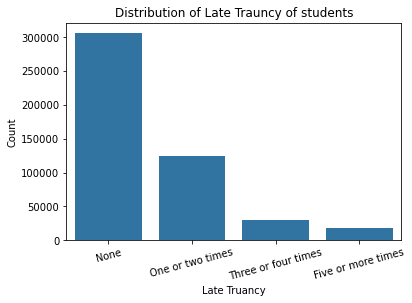

In [63]:
# Univariate Plot 1: Bar chart for truancy in being late (Truancy_Late)
# the `color_palette()` returns the the current / default palette as a list of RGB tuples.  
# select the first tuple of RGB colors for a default colour
base_color = sb.color_palette()[0]

sb.countplot(data=pisa_new, x='Truancy_Late', color=base_color)

# rotation of x-ticks, since tick labels overlap
plt.xticks(rotation = 15)

# add labels and title
plt.xlabel('Late Truancy')
plt.ylabel('Count')
plt.title('Distribution of Late Trauncy of students');

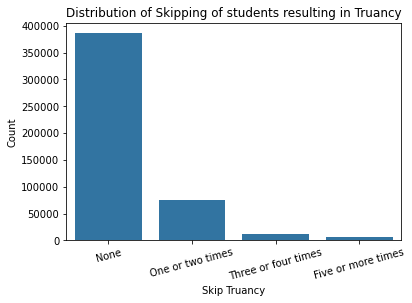

In [64]:
# Univariate Plot 2: Bar chart for truancy skipping (Truancy_Skip)
sb.countplot(data=pisa_new, x='Truancy_Skip', color=base_color)

# rotation of x-ticks, since tick labels overlap
plt.xticks(rotation = 15)

# add labels and title
plt.xlabel('Skip Truancy')
plt.ylabel('Count')
plt.title('Distribution of Skipping of students resulting in Truancy');

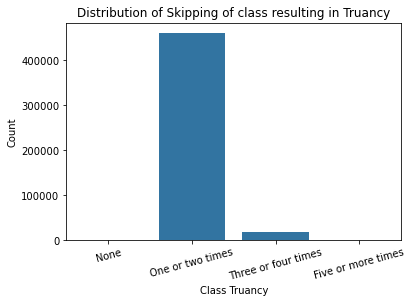

In [65]:
# Univariate Plot 3: Bar chart for truancy skipping class (Truancy_Class)
sb.countplot(data=pisa_new, x='Truancy_Class', color=base_color)

# rotation of x-ticks, since tick labels overlap
plt.xticks(rotation = 15)

# add labels and title
plt.xlabel('Class Truancy')
plt.ylabel('Count')
plt.title('Distribution of Skipping of class resulting in Truancy');

Plot 1-3 discusses the Truancy of students pread amonngst three features, Truancy_Late, Truancy_Skip, and Truancy_Class. Most students are seen not to have been late or skipped school resulting in a desending number from one to five or more times. On Truancy_Class, students are seen to have skipped one or more classes posing the contrast to Trunacy_Late and Truancy_Skip where more students have skipped none. 

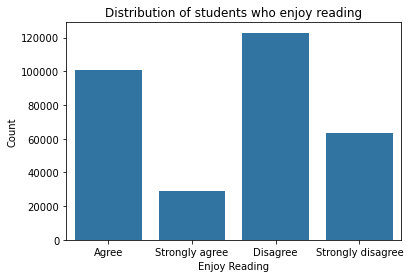

In [66]:
# Univariate Plot 4: Bar chart for students that enjoy reading (Math_EnjoyReading)
sb.countplot(data=pisa_new, x='Math_EnjoyReading', color=base_color)

# add labels and title
plt.xlabel('Enjoy Reading')
plt.ylabel('Count')
plt.title('Distribution of students who enjoy reading');

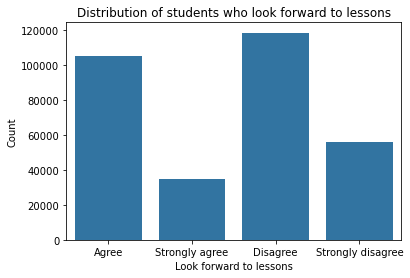

In [67]:
# Univariate Plot 5: Bar chart for students who look forward to lessons (Math_Lessons)
sb.countplot(data=pisa_new, x='Math_Lessons', color=base_color)

# add labels and title
plt.xlabel('Look forward to lessons')
plt.ylabel('Count')
plt.title('Distribution of students who look forward to lessons');

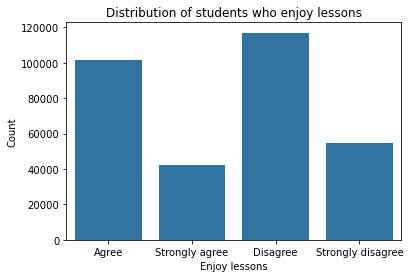

In [68]:
# Univariate Plot 6: Bar chart for students who enjoy maths (Math_EnjoyLessons)
sb.countplot(data=pisa_new, x='Math_EnjoyLessons', color=base_color)

# add labels and title
plt.xlabel('Enjoy lessons')
plt.ylabel('Count')
plt.title('Distribution of students who enjoy lessons');

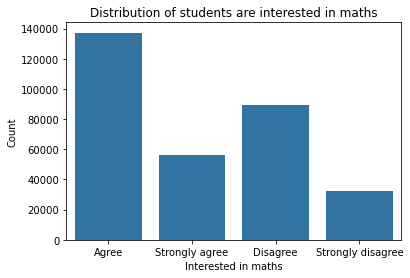

In [69]:
# Univariate Plot 7: Bar chart for students who are interested in Maths (Math_Interested)
sb.countplot(data=pisa_new, x='Math_Interested', color=base_color)

# add labels and title
plt.xlabel('Interested in maths')
plt.ylabel('Count')
plt.title('Distribution of students are interested in maths');

Plots 4-7 discuss the intrests of students in maths.
4 : Most students disagree to enjoy reading with agree coming in second
5 : Most students disagree to look foward to lessons
6 : Most students disagree to enjoy lessons
7 : Most students agree to be interested in maths with a great margin compared to the other options. 
From the above plots, 4-6 have a slight comparison with most students leaning towards the option 'Disagree'. It can be said that a lot os students have intrests in maths but not necessarily enjoy other things such as reading and lessons.

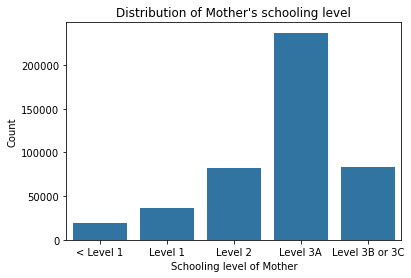

In [70]:
# Univariate Plot 8: Bar chart for Mother's schooling (Mother_Schooling)
sb.countplot(data=pisa_new, x='Mother_Schooling', color=base_color)

# add labels and title
plt.xlabel('Schooling level of Mother')
plt.ylabel('Count')
plt.title('Distribution of Mother\'s schooling level');

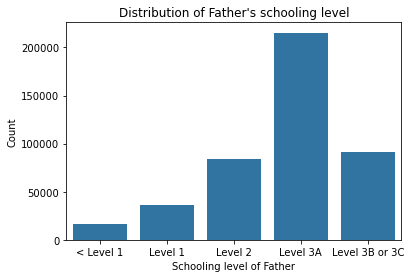

In [71]:
# Univariate Plot 9: Bar chart for Father's schooling (Father_Schooling)
sb.countplot(data=pisa_new, x='Father_Schooling', color=base_color)

# add labels and title
plt.xlabel('Schooling level of Father')
plt.ylabel('Count')
plt.title('Distribution of Father\'s schooling level');

Plots 8 and 9 illustrate the highest schooling level of mother's and father's. It can be seen that most parents have their highest schooling level in Level 3A and next in Level 3B or 3C or in the case of mother's also in Level 2. The number of mother's level in Level 3A is significantly higher than that of father's in the same category.

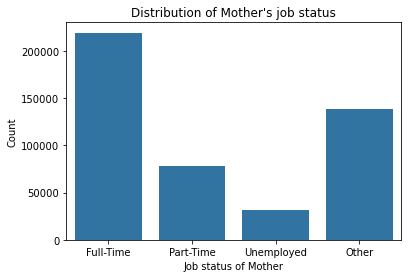

In [72]:
# Univariate Plot 10: Bar chart for Mother's job (Mother_Job)
sb.countplot(data=pisa_new, x='Mother_Job', color=base_color)

# add labels and title
plt.xlabel('Job status of Mother')
plt.ylabel('Count')
plt.title('Distribution of Mother\'s job status');

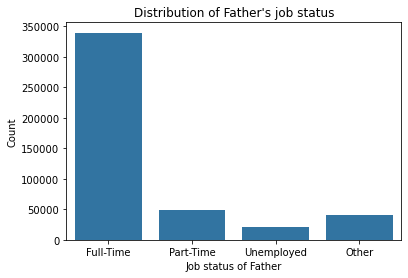

In [73]:
# Univariate Plot 11: Bar chart for Father's job (Father_Job)
sb.countplot(data=pisa_new, x='Father_Job', color=base_color)

# add labels and title
plt.xlabel('Job status of Father')
plt.ylabel('Count')
plt.title('Distribution of Father\'s job status');

Plots 10 and 11 illustrate the job status of parents. Most parents are employed full time in both cases of the mother and father. The surprise in plot 10 is the significant number of mother's who work in the other category compared to others.

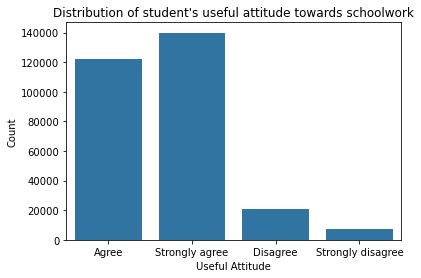

In [74]:
# Univariate Plot 12: Bar chart for useful attitude of students towards schoolwork (Attitude_Useful)
sb.countplot(data=pisa_new, x='Attitude_Useful', color=base_color)

# add labels and title
plt.xlabel('Useful Attitude')
plt.ylabel('Count')
plt.title('Distribution of student\'s useful attitude towards schoolwork');

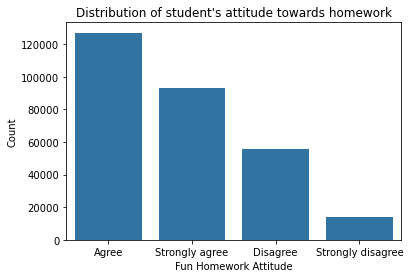

In [75]:
# Univariate Plot 13: Bar chart for useful attitude of students towards homework (Attitude_Homework)
sb.countplot(data=pisa_new, x='Attitude_Homework', color=base_color)

# add labels and title
plt.xlabel('Fun Homework Attitude')
plt.ylabel('Count')
plt.title('Distribution of student\'s attitude towards homework');

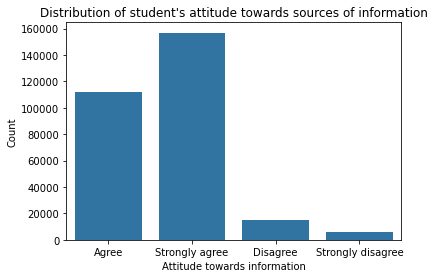

In [76]:
# Univariate Plot 14: Bar chart for useful attitude of students towards sources of information (Attitude_Homework)
sb.countplot(data=pisa_new, x='Attitude_Information', color=base_color)

# add labels and title
plt.xlabel('Attitude towards information')
plt.ylabel('Count')
plt.title('Distribution of student\'s attitude towards sources of information');

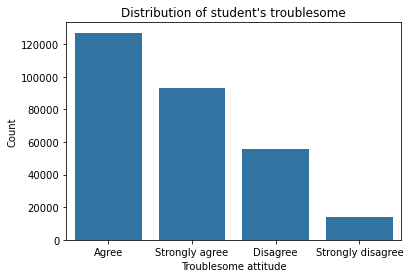

In [77]:
# Univariate Plot 15: Bar chart for troublesome students (Attitude_Troublesome)
sb.countplot(data=pisa_new, x='Attitude_Homework', color=base_color)

# add labels and title
plt.xlabel('Troublesome attitude')
plt.ylabel('Count')
plt.title('Distribution of student\'s troublesome');

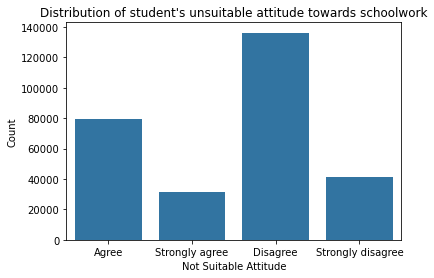

In [78]:
# Univariate Plot 16: Bar chart for students not suitable for schoolwork (Attitude_Notsuitable)
sb.countplot(data=pisa_new, x='Attitude_Notsuitable', color=base_color)

# add labels and title
plt.xlabel('Not Suitable Attitude')
plt.ylabel('Count')
plt.title('Distribution of student\'s unsuitable attitude towards schoolwork');

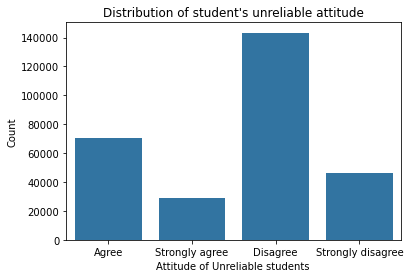

In [79]:
# Univariate Plot 17: Bar chart for attitude of unreliable students (Attitude_Unreliable)
sb.countplot(data=pisa_new, x='Attitude_Unreliable', color=base_color)

# add labels and title
plt.xlabel('Attitude of Unreliable students ')
plt.ylabel('Count')
plt.title('Distribution of student\'s unreliable attitude');

Plots 12-17 illustrates the attitude of students towards school and homework. Most students fall under strongly agreee for attitude towards shool work and sources of information. Disagree for unreliable and unsuitable attitude and lastly agree for troublemsome attitude

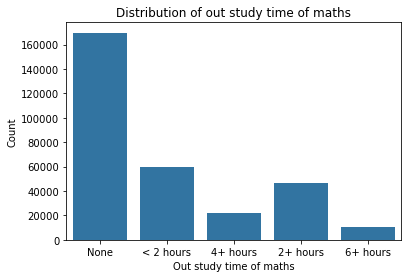

In [80]:
# Univariate Plot 18: Bar chart for attitude of unreliable students (Attitude_Unreliable)
sb.countplot(data=pisa_new, x='Out_Maths', color=base_color)

# add labels and title
plt.xlabel('Out study time of maths')
plt.ylabel('Count')
plt.title('Distribution of out study time of maths');

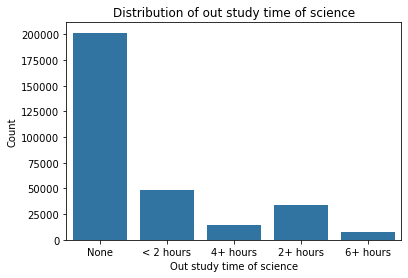

In [81]:
# Univariate Plot 19: Bar chart for attitude of unreliable students (Attitude_Unreliable)
sb.countplot(data=pisa_new, x='Out_Science', color=base_color)

# add labels and title
plt.xlabel('Out study time of science')
plt.ylabel('Count')
plt.title('Distribution of out study time of science');

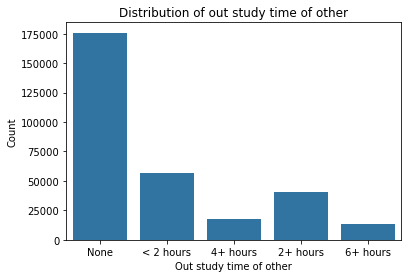

In [82]:
# Univariate Plot 20: Bar chart for attitude of unreliable students (Attitude_Unreliable)
sb.countplot(data=pisa_new, x='Out_Other', color=base_color)

# add labels and title
plt.xlabel('Out study time of other')
plt.ylabel('Count')
plt.title('Distribution of out study time of other');

Plots 18-20 illustrate the out study time for different subjects such as math and science. Most students spend their out study time studying none of these subjects.

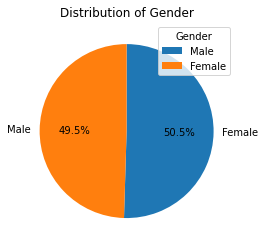

In [83]:
# Univariate Plot 21: Pie chart for gender (Gender)
sorted_counts = pisa_new['Gender'].value_counts()

plt.pie(sorted_counts, labels = sorted_counts.index, startangle = 90, autopct = '%1.1f%%', counterclock = False);

# add title and legend
plt.title("Distribution of Gender")
plt.legend(['Male', 'Female'], title = 'Gender');

Plot 21 shows that there in a slight increase in percentages in the data as there are more females than males

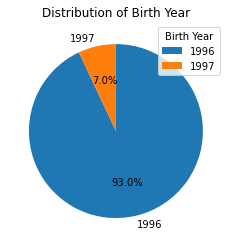

In [84]:
# Univariate Plot 22: Pie plot for Birth Year (Birth_Year)
sorted_counts = pisa_new['Birth_Year'].value_counts()

plt.pie(sorted_counts, labels = sorted_counts.index, startangle = 90, autopct = '%1.1f%%', counterclock = False);

# add title and legend
plt.title("Distribution of Birth Year")
plt.legend(['1996', '1997'], title = 'Birth Year');

Most of the data in Plot 22 shows that most of the students are born in 1996 with 93%

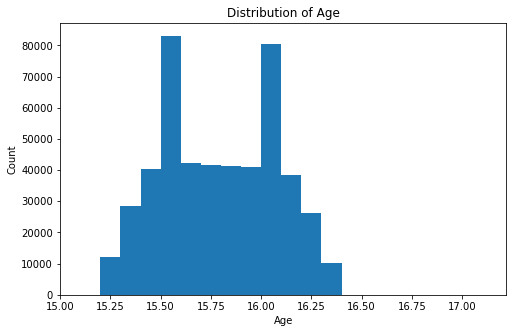

In [85]:
# Univariate Plot 23: Histogram plot for age (Age)
# set size of chart 
plt.figure(figsize=[8, 5])

# set bin size 
binsize = 0.1
bins = np.arange(0, pisa_new['Age'].max()+binsize, binsize)

plt.hist(data = pisa_new, x = 'Age', bins = bins)

# add title and labels
plt.xlim(15.0)
plt.title("Distribution of Age")
plt.xlabel('Age')
plt.ylabel('Count')
plt.show();

The data in plot 23 shows that the data distribution in the feature Age with all students placing in the range 15.0 to 16.50

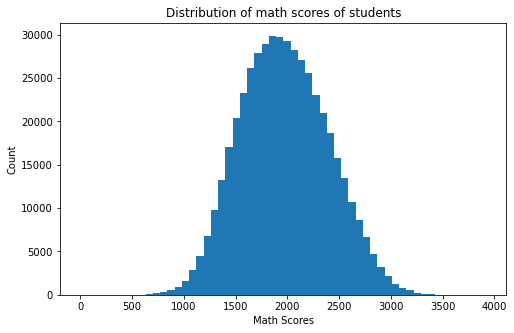

In [86]:
# Univariate Plot 24: Histogram plot for math score (Math_Scores)
# set size of chart 
plt.figure(figsize=[8, 5])

# set bin size 
binsize = 70
bins = np.arange(0, pisa_new['Math_Scores'].max()+binsize, binsize)

plt.hist(data = pisa_new, x = 'Math_Scores', bins = bins)

# add title and labels
plt.title("Distribution of math scores of students")
plt.xlabel('Math Scores')
plt.ylabel('Count')
plt.show();

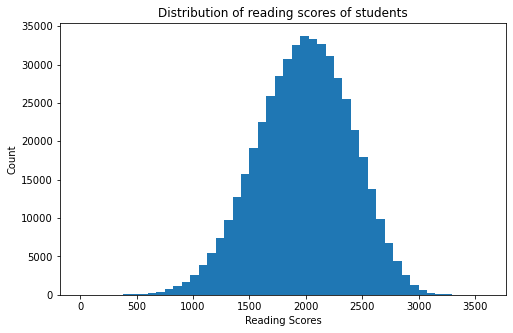

In [87]:
# Univariate Plot 25: Histogram plot for reading score (Reading_Scores)
# set size of chart 
plt.figure(figsize=[8, 5])

# set bin size 
binsize = 75
bins = np.arange(0, pisa_new['Read_Scores'].max()+binsize, binsize)

plt.hist(data = pisa_new, x = 'Read_Scores', bins=bins)

# add title and labels
plt.title("Distribution of reading scores of students")
plt.xlabel('Reading Scores')
plt.ylabel('Count')
plt.show();

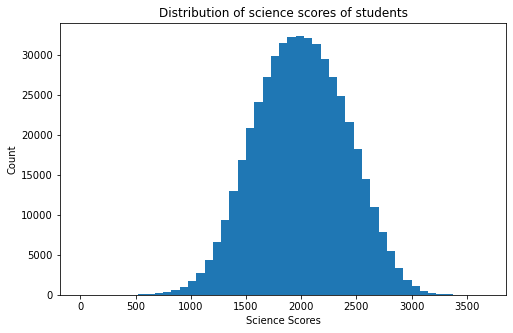

In [88]:
# Univariate Plot 26: Histogram plot for science score (Science_Scores)
# set size of chart 
plt.figure(figsize=[8, 5])

# set bin size 
binsize = 75
bins = np.arange(0, pisa_new['Science_Scores'].max()+binsize, binsize)

plt.hist(data = pisa_new, x = 'Science_Scores', bins=bins)

# add title and labels
plt.title("Distribution of science scores of students")
plt.xlabel('Science Scores')
plt.ylabel('Count')
plt.show();

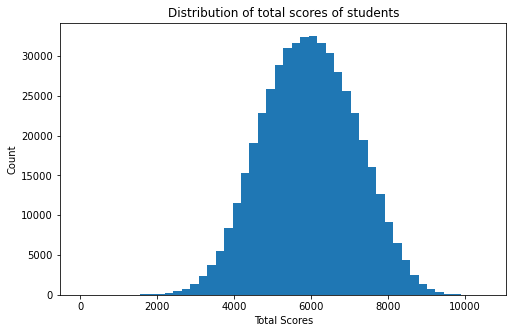

In [89]:
# Univariate Plot 27: Histogram plot for total scores (Total_Scores)
# set size of chart 
plt.figure(figsize=[8, 5])

# set bin size 
binsize = 220
bins = np.arange(0, pisa_new['Total_Scores'].max()+binsize, binsize)

plt.hist(data = pisa_new, x = 'Total_Scores', bins=bins)

# add title and labels
plt.title("Distribution of total scores of students")
plt.xlabel('Total Scores')
plt.ylabel('Count')
plt.show();

Plots 24 - 27 illustrate the scores for math, reading, science, and total. The data in all three is of bi modal distribution with that of math being slightly less than reading scores. Reading scores is also slightly right skewed. From the observations of truancy, interests and enjoyment, math being slightly less in scores is expected.

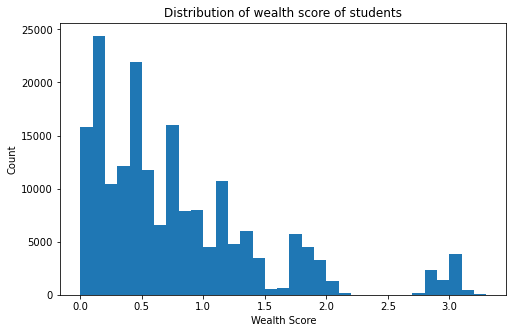

In [90]:
# Univariate Plot 28: Histogram plot for science score (Wealth)
# set size of chart 
plt.figure(figsize=[8, 5])

# set bin size 
binsize = 0.1
bins = np.arange(0, pisa_new['Wealth'].max()+binsize, binsize)

plt.hist(data = pisa_new, x = 'Wealth', bins=bins)
# add title and labels
plt.title("Distribution of wealth score of students")
plt.xlabel('Wealth Score')
plt.ylabel('Count')
plt.show();

Plot 27 illustrates the wealth score of students with a peak at around 0.1. There is however some sparse data sfter 2.1 which rises again at 3.0

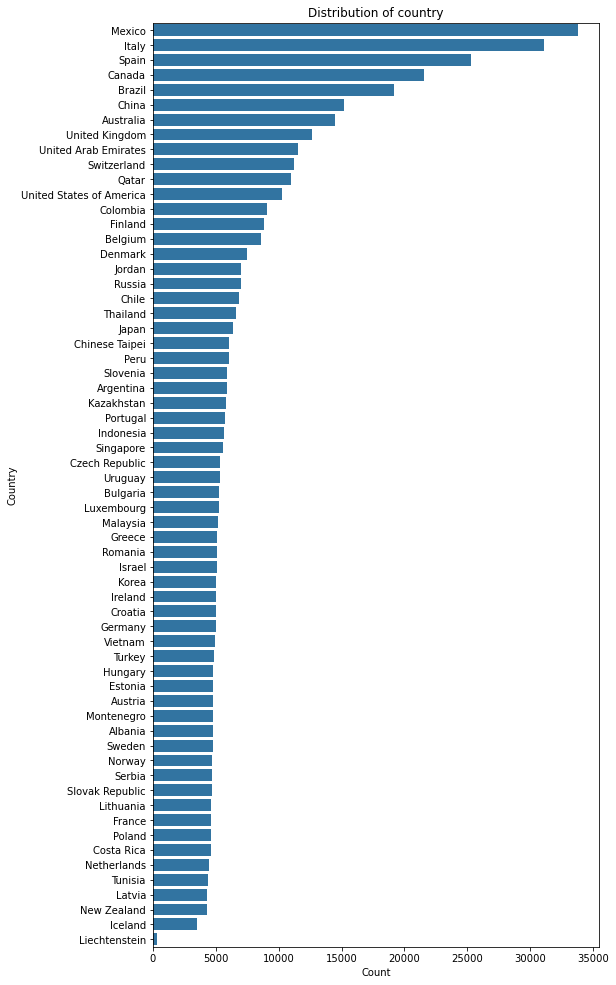

In [91]:
# Univariate Plot 29: Bar chart of country (Country)
# set size of chart 
plt.figure(figsize=[8, 17])
type_order = pisa_new['Country'].value_counts().index
sb.countplot(data=pisa_new, y='Country', color=base_color, order=type_order);

# add labels and title
plt.xlabel('Count')
plt.ylabel('Country')
plt.title('Distribution of country');

Plot 28 ilustrates the number of students in each country where the test was taken. It is sorted in descending order with Mexico containing the highest amount of students at around 3300 students and Liechtenstein with the lowest. 

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> The math, reading, and science scores took on a large range of values, but there were no transformations. Most of the data was concentrated to a specific range as such there were no outliers. Under a smaller binsize the data in all three features appear unimodal with peaks above 30000 or close to.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> When investigating various feature, there were no unusual distibutions, as most inconsistensies where cleaned in the preliminary wrangling stage such as the naming convention of countries or average of math, reading, and science scores.

<a id=bi></a>
## Bivariate Exploration

To start off with, I want to look at the pairwise correlations present between features in the data.

In [92]:
# save all numeric features into a varibale
numeric_vars = ['Age', 'Wealth', 'Math_Scores', 'Read_Scores', 'Science_Scores', 'Total_Scores']

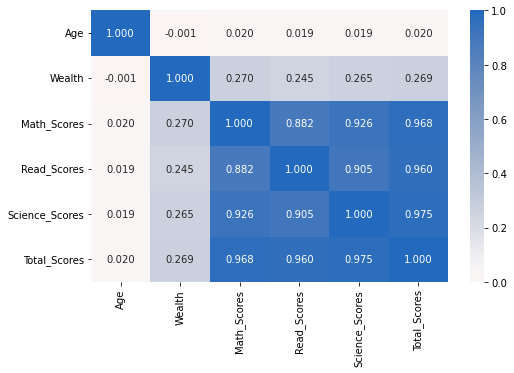

In [93]:
# Bivariate Plot 1: correlation plot of numeric_vars of interest
plt.figure(figsize = [8, 5])
sb.heatmap(pisa_new[numeric_vars].corr(), annot = True, fmt = '.3f',
           cmap = 'vlag_r', center = 0)
plt.show()

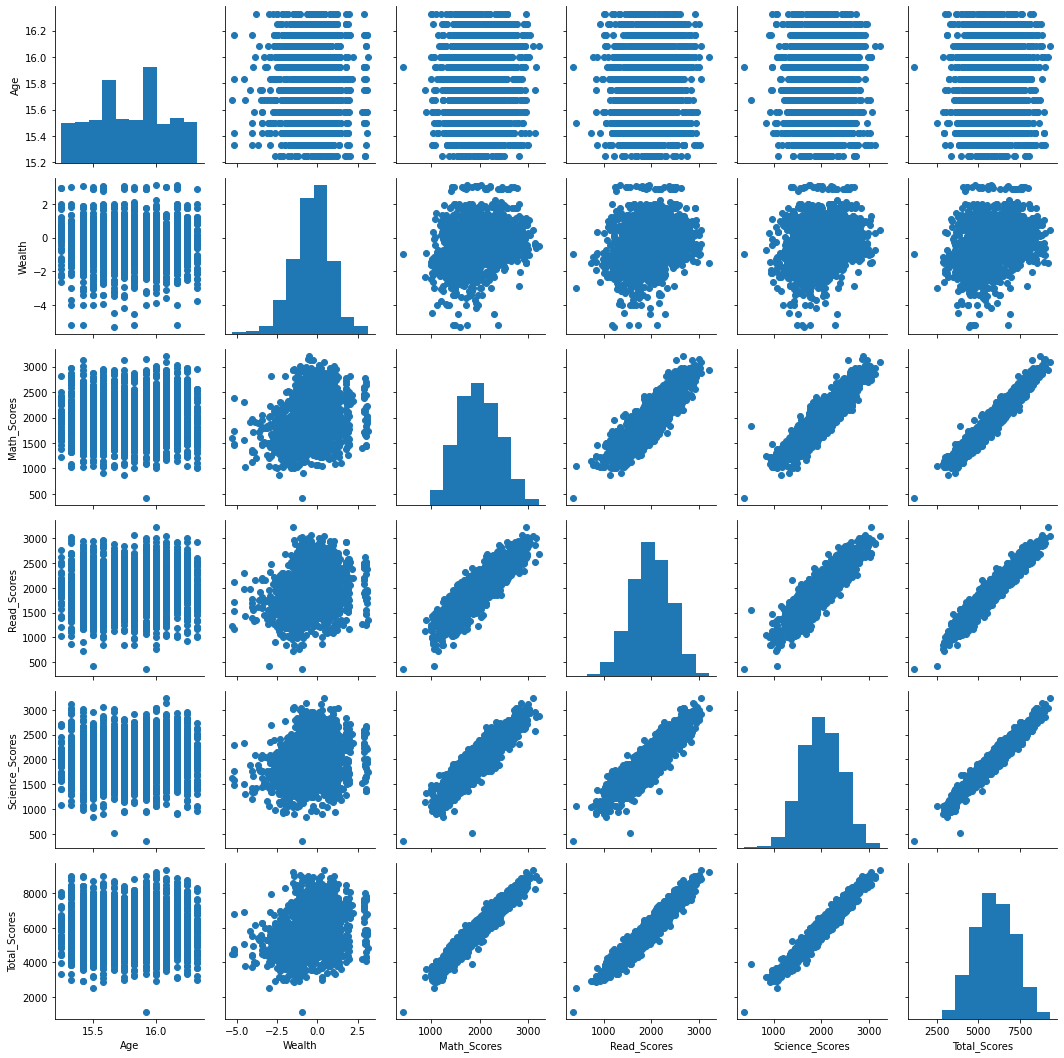

In [94]:
# Bivariate Plot 2: plot matrix of sample 2000 plot for the numeric_vars
samples = np.random.choice(pisa_new.shape[0], 2000, replace = False)
pisa_samp = pisa_new.loc[samples,:]

g = sb.PairGrid(data = pisa_samp, vars = numeric_vars)
g = g.map_diag(plt.hist)
g.map_offdiag(plt.scatter);

Plot 1 and 2 show the correlation of the numeric variables grouped at the beginning. Math_Scores, Reading_Scores, Science_Scores, and Total_Scores are highly correlatated with one another and this is to be expected as Total_Scores ia a measure of the sum of math, reading and science scores. Wealth is also faintly correlated with the scores of the subject and the rest of the features bear low correlation with one another. 

Let's move on with wealth and total scores correlate with the categorical features

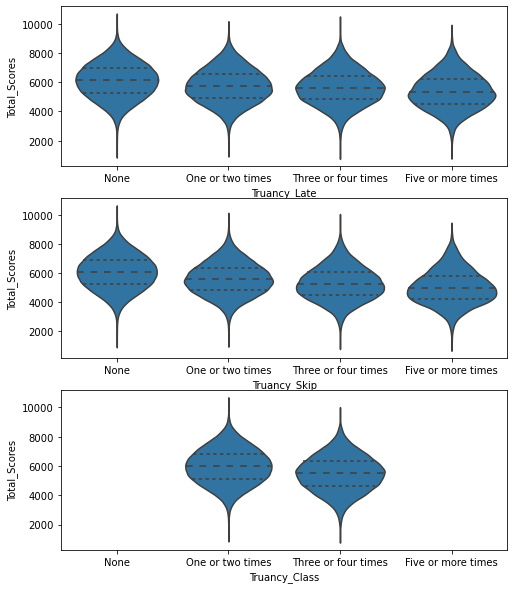

In [95]:
# Bivariate Plot 3: violin plot of trunacy features
fig, ax = plt.subplots(ncols = 1, nrows = 3, figsize = [8,10])

categoric_vars = ['Truancy_Late', 'Truancy_Skip', 'Truancy_Class']
for i in range(len(categoric_vars)):
    var = categoric_vars[i]
    sb.violinplot(data = pisa_new, x = var, y = 'Total_Scores', inner = 'quartile', ax = ax[i],
               color = base_color)
plt.show()

Plot 3 shows that students with no late trauncies and skips have higher total scores than others and also that students with one or two trucnies in class have higher total scores than those with higher skips.

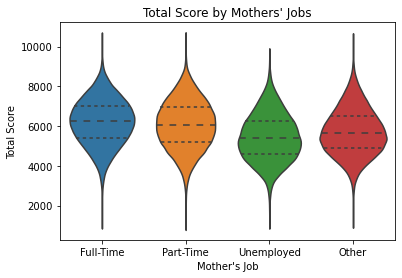

In [96]:
# Bivariate Plot 4: violin plot of mother's job and total score
sb.violinplot(data = pisa_new, x = 'Mother_Job', y = 'Total_Scores', inner = 'quartile');

# Set the plot's title and labels
plt.title("Total Score by Mothers' Jobs")
plt.xlabel("Mother\'s Job")
plt.ylabel('Total Score');

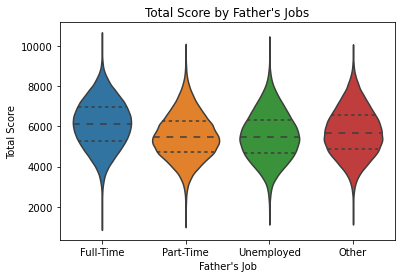

In [97]:
# Bivariate Plot 5: violin plot of father's job and total score
sb.violinplot(data = pisa_new, x = 'Father_Job', y = 'Total_Scores', inner = 'quartile');

# Set the plot's title and labels
plt.title("Total Score by Father's Jobs")
plt.xlabel("Father's Job")
plt.ylabel('Total Score');

Plot 4 and 5 show the relationship between parent's job and total score where in both cases parents with full time jobs are prevelant.

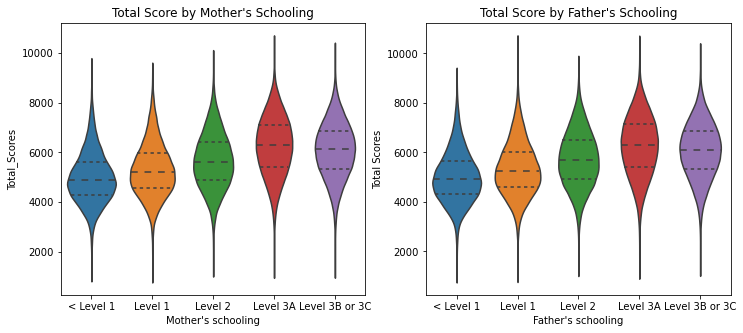

In [98]:
# Bivariate Plot 6: violin plot of mother's schooling and total score
figure, ax = plt.subplots(ncols = 2, nrows = 1, figsize = [12,5])

sb.violinplot(data = pisa_new, x = 'Mother_Schooling', y = 'Total_Scores', inner = 'quartile', ax = ax[0]);
sb.violinplot(data = pisa_new, x = 'Father_Schooling', y = 'Total_Scores', inner = 'quartile', ax = ax[1]);
# Set the plot's title and labels
ax[0].set_title("Total Score by Mother's Schooling")
ax[1].set_title("Total Score by Father's Schooling")
ax[0].set_xlabel("Mother's schooling")
ax[1].set_xlabel("Father's schooling")
plt.ylabel('Total Scores');

Plot 6 illustrates the realtionship between parents schoolingand total score. It can be seen in both instances of mother's and father's schooling that parents with a finishing of Level 3A have children with higher total scores than the rest.

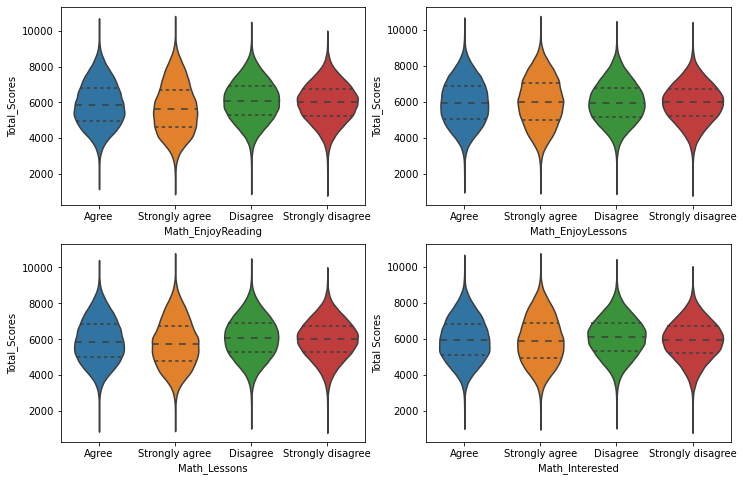

In [99]:
# Bivariate Plot 7: violin plot of math interest and total score
figure, ax = plt.subplots(ncols = 2, nrows = 2, figsize = [12,8])

sb.violinplot(data = pisa_new, x = 'Math_EnjoyReading', y = 'Total_Scores', inner = 'quartile', ax = ax[0,0]);
sb.violinplot(data = pisa_new, x = 'Math_Lessons', y = 'Total_Scores', inner = 'quartile', ax = ax[1,0]);
sb.violinplot(data = pisa_new, x = 'Math_EnjoyLessons', y = 'Total_Scores', inner = 'quartile', ax = ax[0,1]);
sb.violinplot(data = pisa_new, x = 'Math_Interested', y = 'Total_Scores', inner = 'quartile', ax = ax[1,1]);

plt.ylabel('Total Scores');

Plot 4 illustrates the relationship between total scores and four features: students who enjoy reading, lessons, attending lessons and are interested in math. Most of the distribution lies at an even rate from a visual level except in Math_EnjoyLessons where more students leaned into strongly enjoy math lessons.

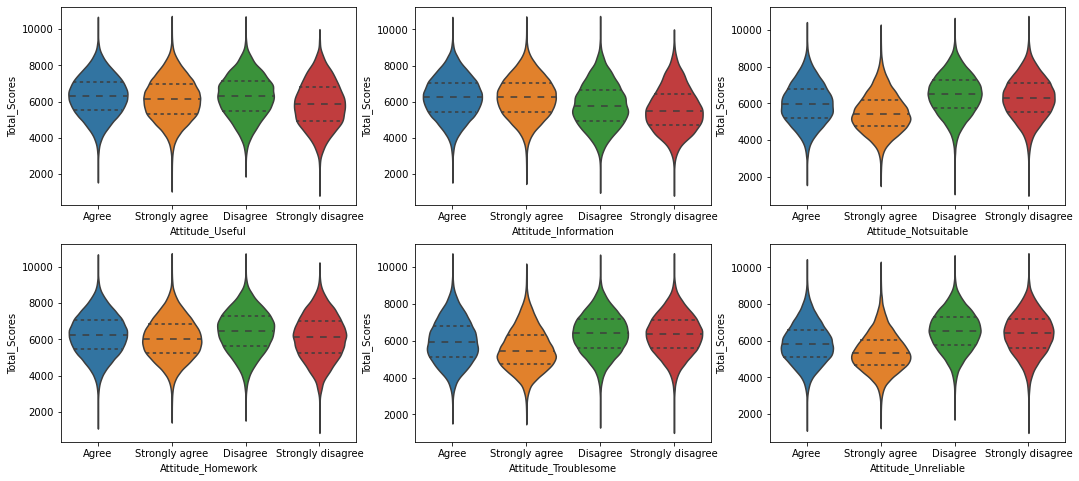

In [100]:
# Bivariate Plot 8: violin plot of attitudes and total score
figure, ax = plt.subplots(ncols = 3, nrows = 2, figsize = [18,8])

sb.violinplot(data = pisa_new, x = 'Attitude_Useful', y = 'Total_Scores', inner = 'quartile', ax = ax[0,0]);
sb.violinplot(data = pisa_new, x = 'Attitude_Homework', y = 'Total_Scores', inner = 'quartile', ax = ax[1,0]);
sb.violinplot(data = pisa_new, x = 'Attitude_Information', y = 'Total_Scores', inner = 'quartile', ax = ax[0,1]);
sb.violinplot(data = pisa_new, x = 'Attitude_Troublesome', y = 'Total_Scores', inner = 'quartile', ax = ax[1,1]);
sb.violinplot(data = pisa_new, x = 'Attitude_Notsuitable', y = 'Total_Scores', inner = 'quartile', ax = ax[0,2]);
sb.violinplot(data = pisa_new, x = 'Attitude_Unreliable', y = 'Total_Scores', inner = 'quartile', ax = ax[1,2]);

Plot 8 illustrates the relationship between total scores and the attitude of students. Most sutudent disagree on being useful for school work, more students strongly agree to being sources of information, they disagree in being not suitable for school work, having fun with home work, being troublesome and unrealiable.

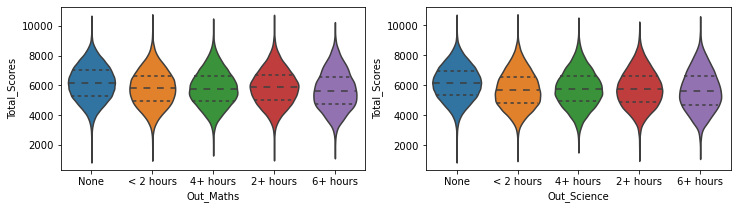

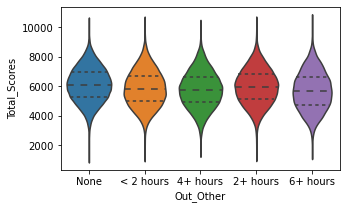

In [101]:
# Bivariate Plot 9: violin plot of out of school lessons and total score
figure, ax = plt.subplots(ncols = 2, nrows = 1, figsize = [12,3])
figure, ax2 = plt.subplots(figsize = [5,3])

sb.violinplot(data = pisa_new, x = 'Out_Maths', y = 'Total_Scores', inner = 'quartile', ax = ax[0]);
sb.violinplot(data = pisa_new, x = 'Out_Science', y = 'Total_Scores', inner = 'quartile', ax = ax[1]);
sb.violinplot(data = pisa_new, x = 'Out_Other', y = 'Total_Scores', inner = 'quartile', ax2 = ax[0]);

Plot 9 illustrates the out of study time of students. Most students do not study maths, science, or others outside of school but study for less than two hours in each subject.

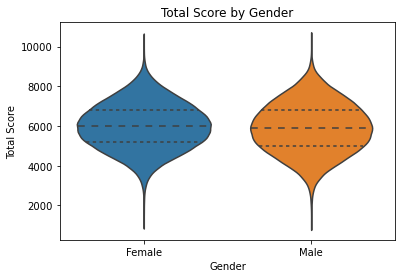

In [102]:
# Bivariate Plot 10: violin plot of gender and total score
sb.violinplot(data = pisa_new, x = 'Gender', y = 'Total_Scores', inner = 'quartile');

# Set the plot's title and labels
plt.title("Total Score by Gender")
plt.xlabel("Gender")
plt.ylabel('Total Score');

Plot 10 illustrates the relationship between total score and gender. As seen in the previous section, gender has a seemly even distraibution between male and female and so visually from the violin plot it might be difficult to tell which is higher.

Next we would move on to the relationship of between categorical variables.

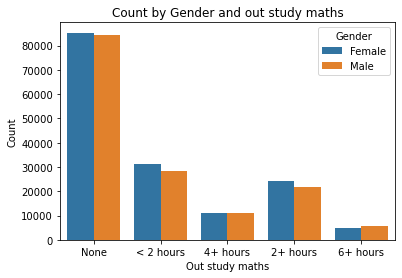

In [103]:
# Bivariate Plot 11: clustered bar chart for gender and out_maths
sb.countplot(data = pisa_new, x = 'Out_Maths', hue = 'Gender')

# set title and axis
plt.title("Count by Gender and out study maths")
plt.ylabel('Count')
plt.xlabel('Out study maths');

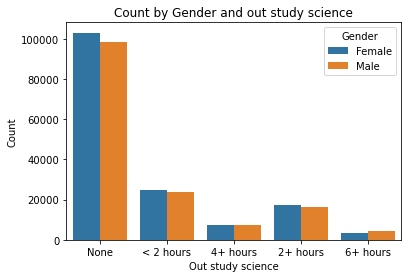

In [104]:
# Bivariate Plot 12: clustered bar chart for gender and out_science
sb.countplot(data = pisa_new, x = 'Out_Science', hue = 'Gender')

# set title and axis
plt.title("Count by Gender and out study science")
plt.ylabel('Count')
plt.xlabel('Out study science');

Plot 11 and 12 illustrates the relationship between gender, out_maths and out_science. As expected the highest count is placed on None for both of them also we can clearly seen an increase in female not attending either maths or science for out of study classes.

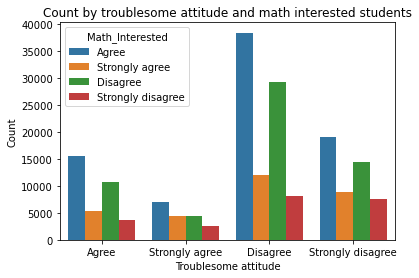

In [105]:
# Bivariate Plot 13: clustered bar chart for troublesome attitude and math interested students
sb.countplot(data = pisa_new, x = 'Attitude_Troublesome', hue = 'Math_Interested')

# set title and axis
plt.title("Count by troublesome attitude and math interested students")
plt.ylabel('Count')
plt.xlabel('Troublesome attitude');

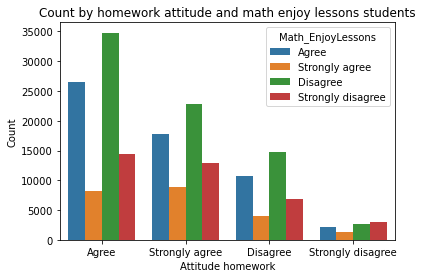

In [106]:
# Bivariate Plot 14: clustered bar chart for homework attitude and math enjoy lessons students
sb.countplot(data = pisa_new, x = 'Attitude_Homework', hue = 'Math_EnjoyLessons')

# set title and axis
plt.title("Count by homework attitude and math enjoy lessons students")
plt.ylabel('Count')
plt.xlabel('Attitude homework');

Plots 12 and 13 illustrates two attitudes against two math intrested types. Students with troublesome attitude agreed to not be intrested intrested in math and surprisingly students with homework more fun attitude disagreed to enjoying math lessons.

Next is the relationship between numeric variables

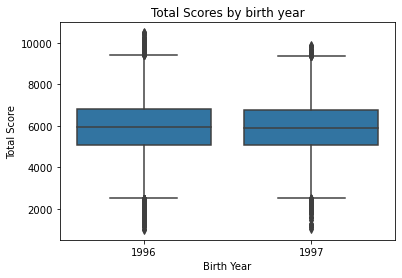

In [130]:
# Bivariate Plot 14: box plot for total scores and birth year
sb.boxplot(data = pisa_new, x = 'Birth_Year', y = 'Total_Scores', color=base_color);

# set title and labels
plt.title("Total Scores by birth year")
plt.ylabel('Total Score')
plt.xlabel("Birth Year");

Plot 14 illustrates the relationship between total scores and birth year. 1996 is higher than 1997, also there are more outliers in the 1996 birth year.

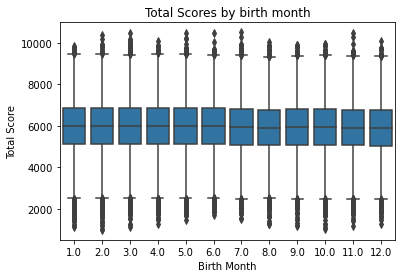

In [108]:
# Bivariate Plot 15: box plot for total scores and birth month
sb.boxplot(data = pisa_new, x = 'Birth_Month', y = 'Total_Scores', color=base_color);

# set title and labels
plt.title("Total Scores by birth month")
plt.ylabel('Total Score')
plt.xlabel("Birth Month");

The data in plot 15 is visually the same. There are a lot of outliers in each month with more slighly in 2.0 and 10.0

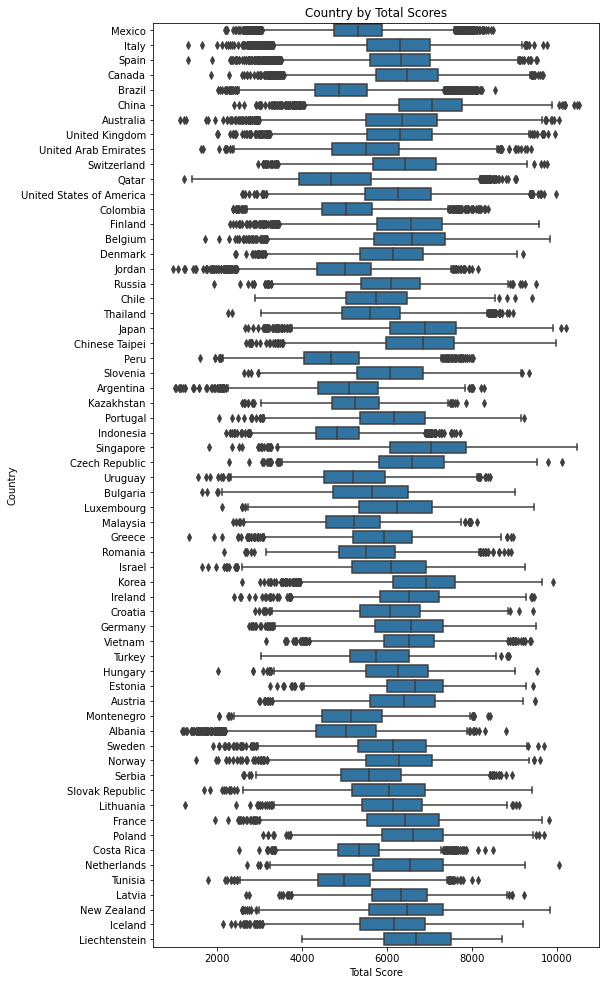

In [109]:
# Bivariate Plot 16: box plot for total scores and birth month
plt.figure(figsize=[8, 17])
sb.boxplot(data = pisa_new, x = 'Total_Scores', y = 'Country', color=base_color, order=type_order);

# set title and labels
plt.title("Country by Total Scores")
plt.xlabel('Total Score')
plt.ylabel("Country");

From the plot above it appears that the hightest scores of students were from Singapore followed by Japan and in last place, Indonesia which has a lot of outliers.

In [110]:
def cuberoot_trans(x, inverse = False):
    """ quick function for computing cube root and cube operations """
    if not inverse:
        return x ** (1/3)
    else:
        return x ** 3

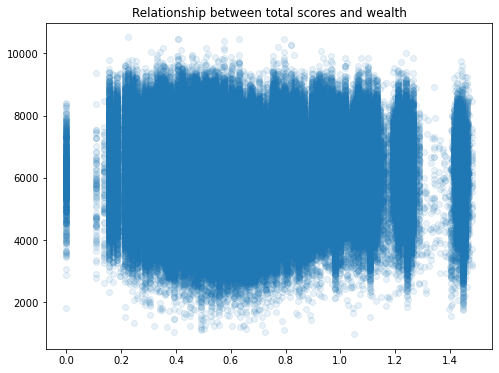

In [136]:
# Bivariate Plot 17: scatter plot for wealth and total scores
pisa_new['cr_wealth'] = pisa_new['Wealth'].apply(cuberoot_trans)

plt.figure(figsize = [8, 6])
plt.title('Relationship between total scores and wealth')
plt.scatter(data = pisa_new, x = 'cr_wealth', y = 'Total_Scores', alpha = 1/10);

There are various overlapping points in the scatter plot and the relationship is not clear either. The mean is high wound a wealth of 0.4 upwards.

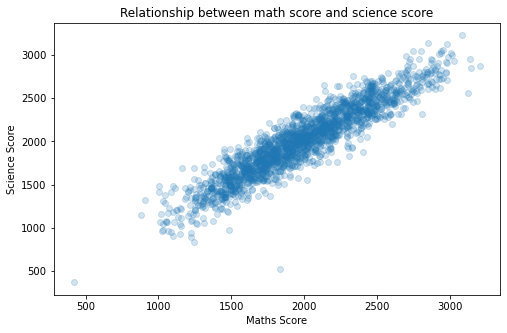

In [112]:
# Bivariate Plot 18: scatter plot for math and science scores
# using sample size of 2000 stored in pisa_samp
plt.figure(figsize=[8, 5])
plt.scatter(data=pisa_samp, x='Math_Scores', y='Science_Scores', alpha=0.2)
plt.title('Relationship between math score and science score')
plt.xlabel('Maths Score')
plt.ylabel('Science Score');

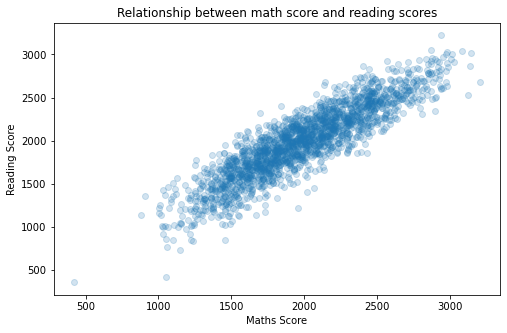

In [113]:
# Bivariate Plot 19: scatter plot for math and reading scores
# using sample size of 2000 stored in pisa_samp
plt.figure(figsize=[8, 5])
plt.scatter(data=pisa_samp, x='Math_Scores', y='Read_Scores', alpha=0.2)
plt.title('Relationship between math score and reading scores')
plt.xlabel('Maths Score')
plt.ylabel('Reading Score');

Plot 18 and 19 illutrates the realtion between math, science and reading scores. These features are strongly related with one another posing the fact as one increases so does the other.

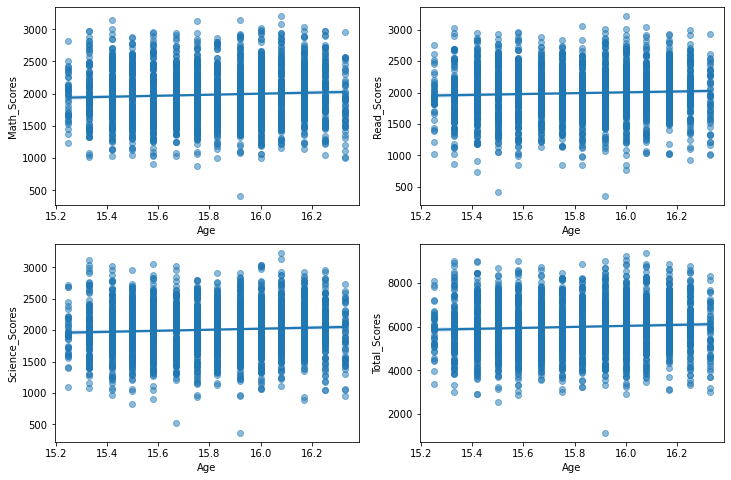

In [114]:
# Bivariate Plot 20: reg plot of age, math, science, and total scores
figure, ax = plt.subplots(ncols = 2, nrows = 2, figsize = [12,8])

sb.regplot(data = pisa_samp, x = 'Age', y = 'Math_Scores', scatter_kws = {'alpha' : 0.5}, ax = ax[0,0]);
sb.regplot(data = pisa_samp, x = 'Age', y = 'Science_Scores', scatter_kws = {'alpha' : 0.5}, ax = ax[1,0]);
sb.regplot(data = pisa_samp, x = 'Age', y = 'Read_Scores', scatter_kws = {'alpha' : 0.5}, ax = ax[0,1]);
sb.regplot(data = pisa_samp, x = 'Age', y = 'Total_Scores', scatter_kws = {'alpha' : 0.5}, ax = ax[1,1]);

From plot 20, there is no increase or change in the realtionship between age and the other features as the line remains flat. This would not be further explored.

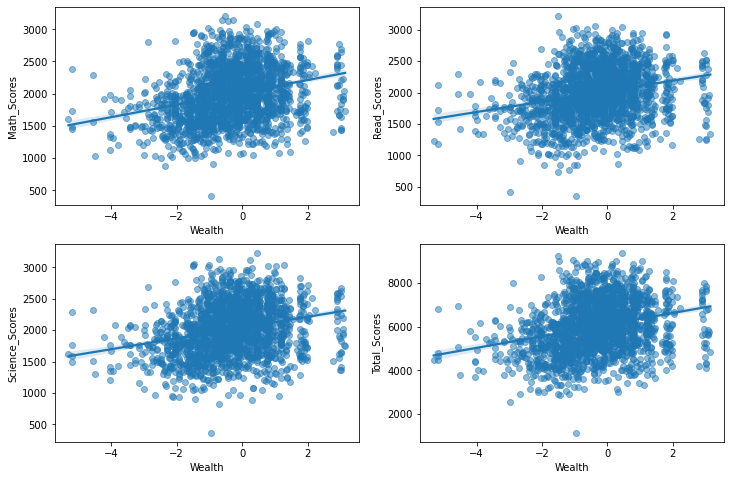

In [115]:
# Bivariate Plot 20: reg plot of a wealth, math, science, and total scores
figure, ax = plt.subplots(ncols = 2, nrows = 2, figsize = [12,8])

sb.regplot(data = pisa_samp, x = 'Wealth', y = 'Math_Scores', scatter_kws = {'alpha' : 0.5}, ax = ax[0,0]);
sb.regplot(data = pisa_samp, x = 'Wealth', y = 'Science_Scores', scatter_kws = {'alpha' : 0.5}, ax = ax[1,0]);
sb.regplot(data = pisa_samp, x = 'Wealth', y = 'Read_Scores', scatter_kws = {'alpha' : 0.5}, ax = ax[0,1]);
sb.regplot(data = pisa_samp, x = 'Wealth', y = 'Total_Scores', scatter_kws = {'alpha' : 0.5}, ax = ax[1,1]);

In plot 20 there is a little significant increase between wealth and the score variables. Although there is a negative in wealth the increase still appears aparent in positive values.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> Math, reading, and science scores has a suprsingly high correlation from the first correlation plot and further the scatter plot showly the extremely high rate. The relationship with total scores and wealth however was very hard to read and when plotted in a regplot with the other features of interest there was a slight increase. In the realtionship between the total, scores and the categorical varibales, total scores posed an intresting realtionship as in parent's schooling and job status as it showed the students with higher total scores had parent in the school level of level 3A and working in full time. In truancy features, students who had missed or skip classes or school none or one or two times had a higher score than the others. Even in the relationship with country we could see the highest score being from SIngapore which would be further explored. Also, we could also shee the students with the highest total_scores enjoyed lessons.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> As expected features such as attitude and interest were realted and brought intresting relationship such as the troublesome attiude and and math intrested also that of homework attitude and theat of student who enjoy lessons. The data showed a lot of connections with the taotal score as we were able to find out the country with the highest total scores which was not mexico which was explored in the univariate exploration section. There were inconclusive onese such as that of gender or wealth against total scores and intresting ones such as the out study time for math science and other with students leaning towards < 2 for all three features after 'None'.

<a id=multi></a>
## Multivariate Exploration

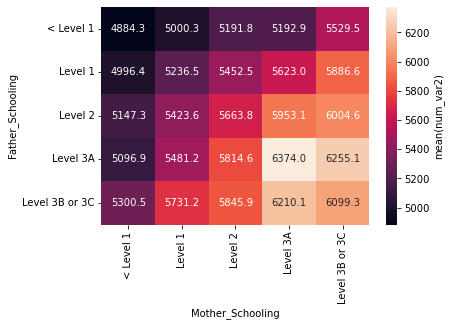

In [116]:
# Multivarivate plot 1: Heatmap of mother schooling, father schooling and total scores
cat_means = pisa_new.groupby(['Mother_Schooling', 'Father_Schooling']).mean()['Total_Scores']
cat_means = cat_means.reset_index(name = 'num_var2_avg')
cat_means = cat_means.pivot(index = 'Father_Schooling', columns = 'Mother_Schooling',
                            values = 'num_var2_avg')
sb.heatmap(cat_means, annot = True, fmt = '.1f',
           cbar_kws = {'label' : 'mean(num_var2)'});

From plot 1 we can see that Level 3A which was a subject of intrest from the last section is marked as the highest relation with 6374.0, next is Level 3B or 3C in mother schooling and level 3A in father. So we can summize that most students with high total scores have fathers in Level 3A and mothers in Level 3A, 3B, or 3C

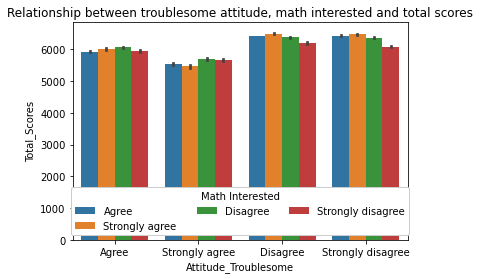

In [117]:
# Multivarivate plot 2: Clustered bar chart of troublesome attitude, math interested and total scores
ax = sb.barplot(data = pisa_new, x = 'Attitude_Troublesome', y = 'Total_Scores', hue = 'Math_Interested')
ax.legend(loc = 8, ncol = 3, framealpha = 1, title = 'Math Interested')
plt.title('Relationship between troublesome attitude, math interested and total scores');

In plot 2, the interested attitude is strong with students who disareee to having a torublesome attitude. This means that students with high total scores do not have the troublesome attitude.

In [118]:
# select scores above the mean of total scores
scores_flag = pisa_new['Total_Scores'] >= pisa_new['Total_Scores'].mean()
scores_mean = pisa_new.loc[scores_flag,:]

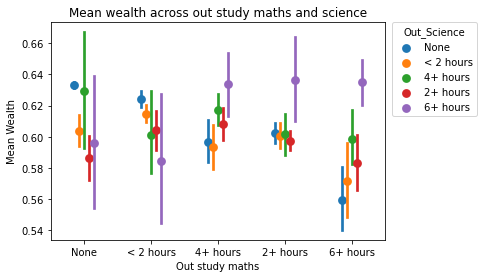

In [119]:
# Multivarivate plot 3: Point plot of wealth by out science and out math
ax = sb.pointplot(data = scores_mean, x = 'Out_Maths', y = 'cr_wealth', hue = 'Out_Science',
                  dodge = 0.3, linestyles = "");
plt.title('Mean wealth across out study maths and science')
plt.ylabel('Mean Wealth')
plt.xlabel('Out study maths')
#place legend outside top right corner of plot
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', title = 'Out_Science', borderaxespad=0);

In [120]:
# select scores less than the mean of total scores
scores_flag = pisa_new['Total_Scores'] < pisa_new['Total_Scores'].mean()
scores_lessmean = pisa_new.loc[scores_flag,:]

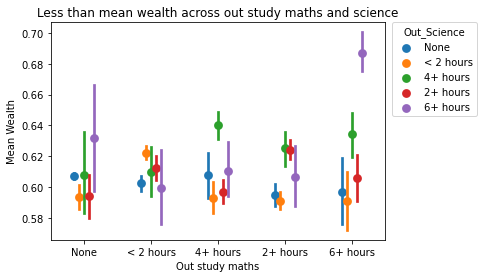

In [121]:
# Multivarivate plot 4: Point plot of wealth by out science and out math
ax = sb.pointplot(data = scores_lessmean, x = 'Out_Maths', y = 'cr_wealth', hue = 'Out_Science',
                  dodge = 0.3, linestyles = "");
plt.title('Less than mean wealth across out study maths and science')
plt.ylabel('Mean Wealth')
plt.xlabel('Out study maths')
#place legend outside top right corner of plot
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', title = 'Out_Science', borderaxespad=0);

Plot 3 and 4 talk about the wealth of students greather and less than the mean of total scores by out study maths and out study science. In plot 3 the study time of out science for 6 + hours is greater than most hours in out maths. Most students higher than the mean score study science more than math for out study. In plot 4, 6+ hour study time seems proportionate in out maths and out science.

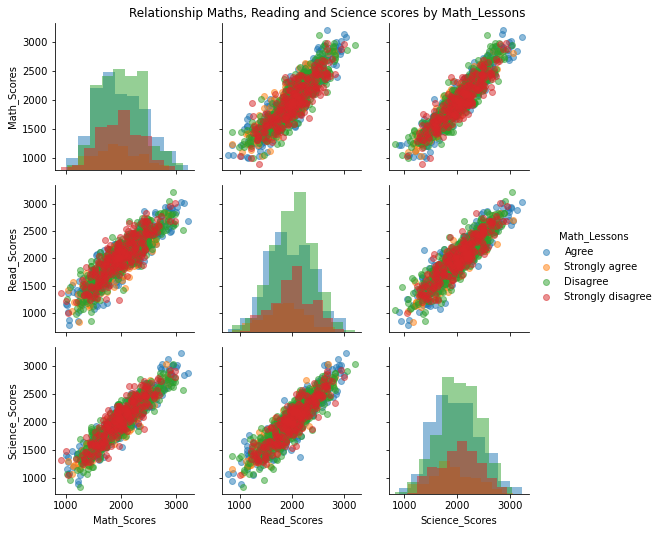

In [122]:
# Multivarivate plot 5: scatter and hist plot for math, science, and read scores against math lessons
# using a sample of 2000
g = sb.PairGrid(data=pisa_samp, vars = ['Math_Scores', 'Read_Scores', 'Science_Scores'], hue='Math_Lessons')
g.map_diag(plt.hist, alpha=0.5)
g.map_offdiag(plt.scatter, alpha=0.5)
g.add_legend()
g.fig.subplots_adjust(top=0.95)
g.fig.suptitle('Relationship Maths, Reading and Science scores by Math_Lessons');

Plot 5 depicts the relationship, between math, read and science scores and it is strongly correlated as seen in the bivariate exploration as well. So, the more students who agree to to math lessons having the scores in the subjects the more students will disagree and fufill the other categories as well.

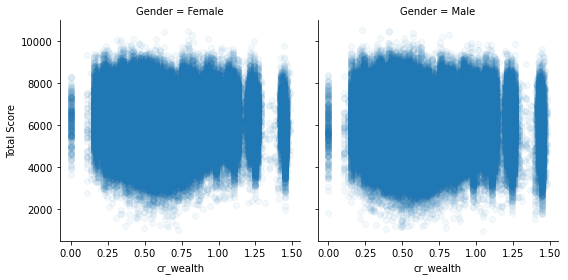

In [123]:
# Multivariate Plot 6: scatter plot of total score, wealth by gender
g = sb.FacetGrid(data = pisa_new, col = 'Gender', height = 4)
g.map(plt.scatter, 'cr_wealth', 'Total_Scores', alpha = 1/20)

# Set the column titles and the labels
g.set_titles(col_template="Gender = {col_name}", row_template="{row_name}")
g.set_axis_labels("cr_wealth", "Total Score");

In plot 6 the data is unclear, however it remains that for students who have higher wealth whether male or feamale remain at around the same total score nothing significantly higher or lower.

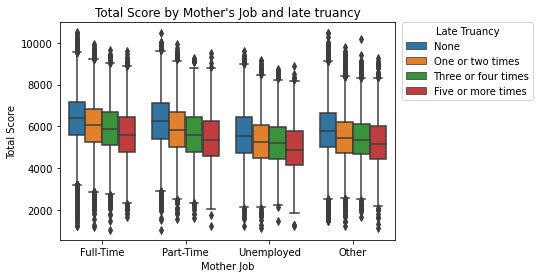

In [124]:
# Multivariate Plot 7: Box plot of total score by Mother Job and trunacy late
sb.boxplot(data = pisa_new, x = 'Mother_Job', y = 'Total_Scores', hue = 'Truancy_Late');

# Set the plot's title and labels
plt.title("Total Score by Mother's Job and late truancy")
plt.ylabel('Total Score')
plt.xlabel('Mother Job');

#place legend outside top right corner of plot
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', title = 'Late Truancy', borderaxespad=0);

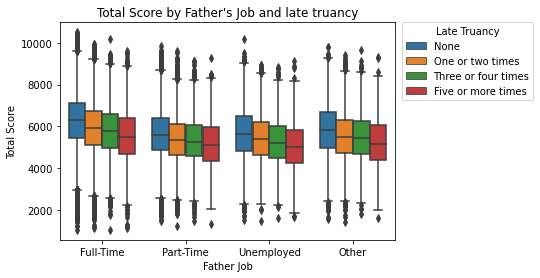

In [125]:
# Multivariate Plot 8: Box plot of total score by Mother Job and trunacy late
sb.boxplot(data = pisa_new, x = 'Father_Job', y = 'Total_Scores', hue = 'Truancy_Late');

# Set the plot's title and labels
plt.title("Total Score by Father's Job and late truancy")
plt.ylabel('Total Score')
plt.xlabel('Father Job');

#place legend outside top right corner of plot
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', title = 'Late Truancy', borderaxespad=0);

Plots 7 and 8 expand on the nature of late tuancies against parents jobs. In plot 7 students with no late truancies and part-time mothers have higher total scores and in plot 8 students with no late truancies and full-time fathers have higher total scores.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> As an extension of the bivariate exploration, the numerical features of interests were explored against categorial variables. Total scores was explored more in this section with parents schooling for instance. In this case Level 3A was stated in the previous section as one of intrest and it was proved correct as most students fell under parents with this level. Also in the case of troublesome attitude, students whoa agreed to this had higher rates of disagreement from maths intrested and vice versa proving the assumption of troublesome attitude not beeing associated with math interest. On out of study subjects of maths and science. Students of high scores pass the mean who studied more of science studied less of maths across multiple hours and students of socres less than the mean did not study much either maths or science except in the 6+ hours mark of science which had a higher rate. The correlation of maths, reading, and science scores are is strong showing that instance of math lessons, students who strongly agreed to it rised as much as students who disagreed. As such, it is expected that this could be applied to other categorical variables to since the correlation between the three features are quite high. Lastly it is summarised that no late turancies truly improve the total scores of students, mother with part-time jobs and fathers with full time jobs have childer with higher total scores. This seems intresting as parents job stability played a part in the scores of students. 

### Were there any interesting or surprising interactions between features?

> Form the bivarate exploration of wealth and total scores it was quite unclear how the data behaved from the overlapping points and there was no much difference in this section either while being plotted with gender. Another intresing plot was the replationship between troublesome attitute and intrest in math as there were just slight changes in the number of various categories. 